## Calculate the novelty measure based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

>> We define novelty as a relational construct in a landscape that is based on similarity distances between designs (apps).Similarity is based on the code functions in the Kyriakou et. al. (2022)'s paper, it's based on common visual structures and verbal structures. 

For a single person similarity score of a particular phase, we will get the compared similarity score of the other people in the previous phase. We will identify the one with the highest similarity score to the other person. The novelty measure is then 1 - the highest similarity score. For each design in a phase, the novelty measure. Novelty is a dependent variable in our model. 

In [1]:
%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase4_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
phase12_bogota3 = df4[~(df4['user2'] == df4['user1'])]
stage1_bogota3 = phase12_bogota3.loc[(phase12_bogota3['user1_phase'] == 1) & (phase12_bogota3['user2_phase'] == 2)]
stage1_bogota3 


user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            1            2   
42             lemartinp           nfmorenog            1            2   
43             lemartinp           AFelipeGA            1            2   
44             lemartinp          mballeng91            1            2   
45             lemartinp            dduartec            1            2   
46             lemartinp           srmedinac            1            2   
47             lemartinp        wilson911013            1            2   
48             lemartinp       wapiravaguens            1            2   
49             lemartinp            davidh17            1            2   
50             lemartinp      DianaNavarrete            1            2   
51             lemartinp           jdmonroyg            1            2   
52             lemartinp           jorge52an            1            2   
53             lemartinp     jscastelblancoh            1            2   
54             lemartinp          juclopezso            1            2   
55             lemartinp           afforeroc            1            2   
56             lemartinp         dagofonseca            1            2   
57             lemartinp         lacardenasv            1            2   
58             lemartinp         oacastillol            1            2   
59             lemartinp          ncampuzano            1            2   
60             lemartinp            adriel62            1            2   
61             lemartinp            capinzor            1            2   
62             lemartinp            ofnanezn            1            2   
63             lemartinp           macuestap            1            2   
64             lemartinp              spenas            1            2   
65             lemartinp         kgbayala528            1            2   
66             lemartinp          lgmoralesa            1            2   
67             lemartinp          ronaldsg20            1            2   
68             lemartinp       cccristanchoc            1            2   
69             lemartinp          jmalvarezd            1            2   
70             lemartinp           smarquezo            1            2   
71             lemartinp             sarizag            1            2   
72             lemartinp            Chranium            1            2   
73             lemartinp             DavidQP            1            2   
74             lemartinp         afceballosr            1            2   
75             lemartinp           lizzyt10h            1            2   
76             lemartinp          NicolasPrr            1            2   
77             lemartinp       jumcorredorro            1            2   
78             lemartinp          feartheGru            1            2   
79             lemartinp        Danielsv9207            1            2   
80             lemartinp  JhonEmmanuelTorres            1            2   
120            juligarji           lemartinp            1            2   
122            juligarji           nfmorenog            1            2   
123            juligarji           AFelipeGA            1            2   
124            juligarji          mballeng91            1            2   
125            juligarji            dduartec            1            2   
126            juligarji           srmedinac            1            2   
127            juligarji        wilson911013            1            2   
128            juligarji       wapiravaguens            1            2   
129            juligarji            davidh17            1            2   
130            juligarji      DianaNavarrete            1            2   
131            juligarji           jdmonroyg            1            2   
132            juligarji           jorge52an            1            2   
133            juligarji     jscastelblancoh            1            2   
134            juligarj

In [3]:
stage1_bogota3_high_similarity = stage1_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            1            2   
1   JhonEmmanuelTorres          feartheGru            1            2   
2   JhonEmmanuelTorres           jdmonroyg            1            2   
3         Danielsv9207  JhonEmmanuelTorres            1            2   
4              DavidQP            capinzor            1            2   
5             ofnanezn           srmedinac            1            2   
6             capinzor              spenas            1            2   
7            srmedinac            adriel62            1            2   
8            smarquezo            Chranium            1            2   
9          oacastillol           afforeroc            1            2   
10            davidh17           macuestap            1            2   
11          mballeng91          ronaldsg20            1            2   
12          ronaldsg20          mballeng91            1            2   
13            capinzor             DavidQP            1            2   
14           smarquezo          juclopezso            1            2   
15            dduartec         dagofonseca            1            2   
16            Chranium      DianaNavarrete            1            2   
17           srmedinac            davidh17            1            2   
18         afceballosr       jumcorredorro            1            2   
19            capinzor          lgmoralesa            1            2   
20            Chranium           smarquezo            1            2   
21             DavidQP       cccristanchoc            1            2   
22       jumcorredorro            dduartec            1            2   
23           nfmorenog           lemartinp            1            2   
24         dagofonseca          jmalvarezd            1            2   
25            davidh17             sarizag            1            2   
26           afforeroc           lizzyt10h            1            2   
27       jumcorredorro         afceballosr            1            2   
28         oacastillol          NicolasPrr            1            2   
29         dagofonseca           nfmorenog            1            2   
30          juclopezso         lacardenasv            1            2   
31           nfmorenog          ncampuzano            1            2   
32         lacardenasv            ofnanezn            1            2   
33          jmalvarezd       wapiravaguens            1            2   
34            davidh17     jscastelblancoh            1            2   
35       jumcorredorro         oacastillol            1            2   
36       jumcorredorro         kgbayala528            1            2   
37          jmalvarezd           jorge52an            1            2   
38          jmalvarezd           juligarji            1            2   
39           lizzyt10h           AFelipeGA            1            2   
40           AFelipeGA        wilson911013            1            2   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.615385  
5     0.580247  
6     0.571429  
7     0.562500  
8     0.500000  
9     0.500000  
10    0.478261  
11    0.477884  
12    0.477833  
13    0.432432  
14    0.428571  
15    0.428571  
16    0.400000  
17    0.391892  
18    0.387755  
19    0.382979  
20    0.375000  
21    0.363636  
22    0.345455  
23    0.320000  
24    0.315789  
25    0.305556  
26    0.294118  
27    0.293103  
28    0.291667  
29    0.269231  
30    0.265625  
31    0.260000  
32    0.231579  
33    0.212500  
34    0.209302  
35    0.174603  
36    0.159292  
37    0.085366  
38    0.063291  
39    0.014877  
40    0.012821

In [4]:
import matplotlib.pyplot as plt
phase23_bogota3 = df3[~(df3['user1'] == df3['user2'])]
stage2_bogota3 = phase23_bogota3.loc[(phase23_bogota3['user1_phase'] == 2) & (phase23_bogota3['user2_phase'] == 3)]
stage2_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            2            3   
42             lemartinp           nfmorenog            2            3   
43             lemartinp           AFelipeGA            2            3   
44             lemartinp          mballeng91            2            3   
45             lemartinp            dduartec            2            3   
46             lemartinp           srmedinac            2            3   
47             lemartinp        wilson911013            2            3   
48             lemartinp       wapiravaguens            2            3   
49             lemartinp            davidh17            2            3   
50             lemartinp      DianaNavarrete            2            3   
51             lemartinp           jdmonroyg            2            3   
52             lemartinp           jorge52an            2            3   
53             lemartinp     jscastelblancoh            2            3   
54             lemartinp          juclopezso            2            3   
55             lemartinp           afforeroc            2            3   
56             lemartinp         dagofonseca            2            3   
57             lemartinp         lacardenasv            2            3   
58             lemartinp         oacastillol            2            3   
59             lemartinp          ncampuzano            2            3   
60             lemartinp            adriel62            2            3   
61             lemartinp            capinzor            2            3   
62             lemartinp            ofnanezn            2            3   
63             lemartinp           macuestap            2            3   
64             lemartinp              spenas            2            3   
65             lemartinp         kgbayala528            2            3   
66             lemartinp          lgmoralesa            2            3   
67             lemartinp          ronaldsg20            2            3   
68             lemartinp       cccristanchoc            2            3   
69             lemartinp          jmalvarezd            2            3   
70             lemartinp           smarquezo            2            3   
71             lemartinp             sarizag            2            3   
72             lemartinp            Chranium            2            3   
73             lemartinp             DavidQP            2            3   
74             lemartinp         afceballosr            2            3   
75             lemartinp           lizzyt10h            2            3   
76             lemartinp          NicolasPrr            2            3   
77             lemartinp       jumcorredorro            2            3   
78             lemartinp          feartheGru            2            3   
79             lemartinp        Danielsv9207            2            3   
80             lemartinp  JhonEmmanuelTorres            2            3   
120            juligarji           lemartinp            2            3   
122            juligarji           nfmorenog            2            3   
123            juligarji           AFelipeGA            2            3   
124            juligarji          mballeng91            2            3   
125            juligarji            dduartec            2            3   
126            juligarji           srmedinac            2            3   
127            juligarji        wilson911013            2            3   
128            juligarji       wapiravaguens            2            3   
129            juligarji            davidh17            2            3   
130            juligarji      DianaNavarrete            2            3   
131            juligarji           jdmonroyg            2            3   
132            juligarji           jorge52an            2            3   
133            juligarji     jscastelblancoh            2            3   
134            juligarj

In [5]:
stage2_bogota3_high_similarity = stage2_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            2            3   
1   JhonEmmanuelTorres          feartheGru            2            3   
2   JhonEmmanuelTorres           jdmonroyg            2            3   
3         Danielsv9207  JhonEmmanuelTorres            2            3   
4            srmedinac            ofnanezn            2            3   
5             ofnanezn           srmedinac            2            3   
6             capinzor              spenas            2            3   
7             adriel62            capinzor            2            3   
8           ronaldsg20          mballeng91            2            3   
9           mballeng91          ronaldsg20            2            3   
10             DavidQP       cccristanchoc            2            3   
11            Chranium      DianaNavarrete            2            3   
12           afforeroc            Chranium            2            3   
13            Chranium           afforeroc            2            3   
14            capinzor             DavidQP            2            3   
15            Chranium           smarquezo            2            3   
16           afforeroc          juclopezso            2            3   
17         dagofonseca            adriel62            2            3   
18           macuestap             sarizag            2            3   
19             sarizag           macuestap            2            3   
20             DavidQP          lgmoralesa            2            3   
21           lemartinp           lizzyt10h            2            3   
22       jumcorredorro            davidh17            2            3   
23           nfmorenog          jmalvarezd            2            3   
24           macuestap           lemartinp            2            3   
25          jmalvarezd           nfmorenog            2            3   
26           afforeroc          NicolasPrr            2            3   
27       jumcorredorro         afceballosr            2            3   
28            davidh17       jumcorredorro            2            3   
29           nfmorenog         kgbayala528            2            3   
30           lemartinp         lacardenasv            2            3   
31           lemartinp     jscastelblancoh            2            3   
32       jumcorredorro         oacastillol            2            3   
33          jmalvarezd       wapiravaguens            2            3   
34       jumcorredorro            dduartec            2            3   
35           nfmorenog          ncampuzano            2            3   
36          jmalvarezd         dagofonseca            2            3   
37          ronaldsg20           juligarji            2            3   
38         lacardenasv           jorge52an            2            3   
39         kgbayala528           AFelipeGA            2            3   
40           srmedinac        wilson911013            2            3   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.671429  
5     0.580247  
6     0.571429  
7     0.507246  
8     0.477833  
9     0.477738  
10    0.457627  
11    0.400000  
12    0.400000  
13    0.400000  
14    0.377778  
15    0.375000  
16    0.363636  
17    0.355556  
18    0.342857  
19    0.342857  
20    0.333333  
21    0.307692  
22    0.271605  
23    0.269231  
24    0.269231  
25    0.261905  
26    0.260870  
27    0.250000  
28    0.186441  
29    0.186047  
30    0.181818  
31    0.176471  
32    0.159722  
33    0.159664  
34    0.149606  
35    0.131579  
36    0.085714  
37    0.057472  
38    0.044199  
39    0.013628  
40    0.012107

In [6]:
import matplotlib.pyplot as plt
phase34_bogota3 = df2[~(df2['user1'] == df2['user2'])]
stage3_bogota3 = phase34_bogota3.loc[(phase34_bogota3['user1_phase'] == 3) & (phase34_bogota3['user2_phase'] == 4)]
stage3_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            3            4   
42             lemartinp           nfmorenog            3            4   
43             lemartinp           AFelipeGA            3            4   
44             lemartinp          mballeng91            3            4   
45             lemartinp            dduartec            3            4   
46             lemartinp           srmedinac            3            4   
47             lemartinp        wilson911013            3            4   
48             lemartinp       wapiravaguens            3            4   
49             lemartinp            davidh17            3            4   
50             lemartinp      DianaNavarrete            3            4   
51             lemartinp           jdmonroyg            3            4   
52             lemartinp           jorge52an            3            4   
53             lemartinp     jscastelblancoh            3            4   
54             lemartinp          juclopezso            3            4   
55             lemartinp           afforeroc            3            4   
56             lemartinp         dagofonseca            3            4   
57             lemartinp         lacardenasv            3            4   
58             lemartinp         oacastillol            3            4   
59             lemartinp          ncampuzano            3            4   
60             lemartinp            adriel62            3            4   
61             lemartinp            capinzor            3            4   
62             lemartinp            ofnanezn            3            4   
63             lemartinp           macuestap            3            4   
64             lemartinp              spenas            3            4   
65             lemartinp         kgbayala528            3            4   
66             lemartinp          lgmoralesa            3            4   
67             lemartinp          ronaldsg20            3            4   
68             lemartinp       cccristanchoc            3            4   
69             lemartinp          jmalvarezd            3            4   
70             lemartinp           smarquezo            3            4   
71             lemartinp             sarizag            3            4   
72             lemartinp            Chranium            3            4   
73             lemartinp             DavidQP            3            4   
74             lemartinp         afceballosr            3            4   
75             lemartinp           lizzyt10h            3            4   
76             lemartinp          NicolasPrr            3            4   
77             lemartinp       jumcorredorro            3            4   
78             lemartinp          feartheGru            3            4   
79             lemartinp        Danielsv9207            3            4   
80             lemartinp  JhonEmmanuelTorres            3            4   
120            juligarji           lemartinp            3            4   
122            juligarji           nfmorenog            3            4   
123            juligarji           AFelipeGA            3            4   
124            juligarji          mballeng91            3            4   
125            juligarji            dduartec            3            4   
126            juligarji           srmedinac            3            4   
127            juligarji        wilson911013            3            4   
128            juligarji       wapiravaguens            3            4   
129            juligarji            davidh17            3            4   
130            juligarji      DianaNavarrete            3            4   
131            juligarji           jdmonroyg            3            4   
132            juligarji           jorge52an            3            4   
133            juligarji     jscastelblancoh            3            4   
134            juligarj

In [7]:
stage3_bogota3_high_similarity = stage3_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            3            4   
1   JhonEmmanuelTorres          feartheGru            3            4   
2         Danielsv9207           jdmonroyg            3            4   
3         Danielsv9207  JhonEmmanuelTorres            3            4   
4          dagofonseca         oacastillol            3            4   
5             ofnanezn           srmedinac            3            4   
6            srmedinac            ofnanezn            3            4   
7           ronaldsg20          mballeng91            3            4   
8           mballeng91          ronaldsg20            3            4   
9             Chranium           afforeroc            3            4   
10            Chranium      DianaNavarrete            3            4   
11      DianaNavarrete            Chranium            3            4   
12             DavidQP              spenas            3            4   
13         dagofonseca          NicolasPrr            3            4   
14              spenas             DavidQP            3            4   
15             sarizag           macuestap            3            4   
16            capinzor          lgmoralesa            3            4   
17           macuestap             sarizag            3            4   
18           lemartinp           smarquezo            3            4   
19           lizzyt10h           lemartinp            3            4   
20         lacardenasv          juclopezso            3            4   
21            capinzor       cccristanchoc            3            4   
22          jmalvarezd           nfmorenog            3            4   
23           nfmorenog          jmalvarezd            3            4   
24           macuestap         afceballosr            3            4   
25            adriel62            davidh17            3            4   
26           juligarji         lacardenasv            3            4   
27         lacardenasv           lizzyt10h            3            4   
28           nfmorenog         kgbayala528            3            4   
29           nfmorenog          ncampuzano            3            4   
30          jmalvarezd       wapiravaguens            3            4   
31          jmalvarezd            dduartec            3            4   
32         oacastillol       jumcorredorro            3            4   
33       wapiravaguens     jscastelblancoh            3            4   
34          jmalvarezd         dagofonseca            3            4   
35          ronaldsg20           juligarji            3            4   
36       jumcorredorro           jorge52an            3            4   
37           juligarji            capinzor            3            4   
38           juligarji           AFelipeGA            3            4   
39           juligarji            adriel62            3            4   
40           srmedinac        wilson911013            3            4   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.734756  
5     0.681159  
6     0.671429  
7     0.477713  
8     0.477461  
9     0.400000  
10    0.400000  
11    0.400000  
12    0.361702  
13    0.343931  
14    0.333333  
15    0.333333  
16    0.326923  
17    0.324324  
18    0.310345  
19    0.285714  
20    0.274194  
21    0.261261  
22    0.255814  
23    0.255814  
24    0.239130  
25    0.212963  
26    0.205771  
27    0.195876  
28    0.182482  
29    0.157025  
30    0.147541  
31    0.141844  
32    0.117871  
33    0.095833  
34    0.090592  
35    0.057541  
36    0.046703  
37    0.030310  
38    0.028662  
39    0.023243  
40    0.014458

In [8]:
import matplotlib.pyplot as plt
phase45_bogota3 = df1[~(df1['user1'] == df1['user2'])]
stage4_bogota3 = phase45_bogota3.loc[(phase45_bogota3['user1_phase'] == 4) & (phase45_bogota3['user2_phase'] == 5)]
stage4_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            4            5   
42             lemartinp           nfmorenog            4            5   
43             lemartinp           AFelipeGA            4            5   
44             lemartinp          mballeng91            4            5   
45             lemartinp            dduartec            4            5   
46             lemartinp           srmedinac            4            5   
47             lemartinp        wilson911013            4            5   
48             lemartinp       wapiravaguens            4            5   
49             lemartinp            davidh17            4            5   
50             lemartinp      DianaNavarrete            4            5   
51             lemartinp           jdmonroyg            4            5   
52             lemartinp           jorge52an            4            5   
53             lemartinp     jscastelblancoh            4            5   
54             lemartinp          juclopezso            4            5   
55             lemartinp           afforeroc            4            5   
56             lemartinp         dagofonseca            4            5   
57             lemartinp         lacardenasv            4            5   
58             lemartinp         oacastillol            4            5   
59             lemartinp          ncampuzano            4            5   
60             lemartinp            adriel62            4            5   
61             lemartinp            capinzor            4            5   
62             lemartinp            ofnanezn            4            5   
63             lemartinp           macuestap            4            5   
64             lemartinp              spenas            4            5   
65             lemartinp         kgbayala528            4            5   
66             lemartinp          lgmoralesa            4            5   
67             lemartinp          ronaldsg20            4            5   
68             lemartinp       cccristanchoc            4            5   
69             lemartinp          jmalvarezd            4            5   
70             lemartinp           smarquezo            4            5   
71             lemartinp             sarizag            4            5   
72             lemartinp            Chranium            4            5   
73             lemartinp             DavidQP            4            5   
74             lemartinp         afceballosr            4            5   
75             lemartinp           lizzyt10h            4            5   
76             lemartinp          NicolasPrr            4            5   
77             lemartinp       jumcorredorro            4            5   
78             lemartinp          feartheGru            4            5   
79             lemartinp        Danielsv9207            4            5   
80             lemartinp  JhonEmmanuelTorres            4            5   
120            juligarji           lemartinp            4            5   
122            juligarji           nfmorenog            4            5   
123            juligarji           AFelipeGA            4            5   
124            juligarji          mballeng91            4            5   
125            juligarji            dduartec            4            5   
126            juligarji           srmedinac            4            5   
127            juligarji        wilson911013            4            5   
128            juligarji       wapiravaguens            4            5   
129            juligarji            davidh17            4            5   
130            juligarji      DianaNavarrete            4            5   
131            juligarji           jdmonroyg            4            5   
132            juligarji           jorge52an            4            5   
133            juligarji     jscastelblancoh            4            5   
134            juligarj

In [9]:
stage4_bogota3_high_similarity = stage4_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            4            5   
1   JhonEmmanuelTorres          feartheGru            4            5   
2            jdmonroyg  JhonEmmanuelTorres            4            5   
3          dagofonseca         oacastillol            4            5   
4          oacastillol         dagofonseca            4            5   
5             ofnanezn           srmedinac            4            5   
6            srmedinac            ofnanezn            4            5   
7           lgmoralesa           smarquezo            4            5   
8           mballeng91          ronaldsg20            4            5   
9           ronaldsg20          mballeng91            4            5   
10           afforeroc           jdmonroyg            4            5   
11           afforeroc            Chranium            4            5   
12            Chranium      DianaNavarrete            4            5   
13            Chranium           afforeroc            4            5   
14             DavidQP              spenas            4            5   
15             sarizag           macuestap            4            5   
16              spenas             DavidQP            4            5   
17           nfmorenog          jmalvarezd            4            5   
18          jmalvarezd           nfmorenog            4            5   
19           macuestap             sarizag            4            5   
20             sarizag           lemartinp            4            5   
21          lgmoralesa       cccristanchoc            4            5   
22       cccristanchoc          lgmoralesa            4            5   
23           macuestap         afceballosr            4            5   
24         lacardenasv           juligarji            4            5   
25           juligarji         lacardenasv            4            5   
26          jmalvarezd          NicolasPrr            4            5   
27          lgmoralesa            davidh17            4            5   
28           nfmorenog         kgbayala528            4            5   
29         lacardenasv           AFelipeGA            4            5   
30          jmalvarezd          juclopezso            4            5   
31           lemartinp           lizzyt10h            4            5   
32          jmalvarezd       wapiravaguens            4            5   
33       wapiravaguens          ncampuzano            4            5   
34         afceballosr       jumcorredorro            4            5   
35            davidh17     jscastelblancoh            4            5   
36       jumcorredorro            adriel62            4            5   
37     jscastelblancoh           jorge52an            4            5   
38          NicolasPrr            capinzor            4            5   
39           juligarji            dduartec            4            5   
40           srmedinac        wilson911013            4            5   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.731928  
4     0.705202  
5     0.681159  
6     0.681159  
7     0.505376  
8     0.477579  
9     0.477436  
10    0.437500  
11    0.400000  
12    0.400000  
13    0.400000  
14    0.333333  
15    0.315789  
16    0.265625  
17    0.258824  
18    0.255814  
19    0.255319  
20    0.229167  
21    0.222222  
22    0.220472  
23    0.220000  
24    0.205128  
25    0.204765  
26    0.188679  
27    0.188406  
28    0.182482  
29    0.178175  
30    0.178082  
31    0.157303  
32    0.150794  
33    0.126214  
34    0.115578  
35    0.096774  
36    0.096667  
37    0.048523  
38    0.035670  
39    0.030692  
40    0.014493

## Bogota 2 Pairwise Plots

In [10]:
import matplotlib.pyplot as plt
phase12_bogota2 = df4_bogota2[~(df4_bogota2['user1'] == df4_bogota2['user2'])]
stage1_bogota2 = phase12_bogota2.loc[(phase12_bogota2['user1_phase'] == 1) & (phase12_bogota2['user2_phase'] == 2)]
stage1_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            1            2    0.222222
42       jusherrerama       Phoenixest            1            2    0.210526
43       jusherrerama         HashNick            1            2    0.059701
44       jusherrerama          ccvacad            1            2    0.058824
45       jusherrerama       joaortizro            1            2    0.208333
46       jusherrerama  juasmartinezbel            1            2    0.043478
47       jusherrerama         mdbelloc            1            2    0.059701
48       jusherrerama      diegocruz10            1            2    0.153846
49       jusherrerama       crarojasca            1            2    0.058824
50       jusherrerama           sagilm            1            2    0.210526
51       jusherrerama         idrojasf            1            2    0.003273
52       jusherrerama     raulramirezp            1            2    0.042683
53       jusherrerama        fabianr23            1            2    0.081967
54       jusherrerama       jhriverasa            1            2    0.135135
55       jusherrerama       jhonsd1996            1            2    0.210526
56       jusherrerama       JuanitoAli            1            2    0.002170
57       jusherrerama       Davsatu313            1            2    0.056338
58       jusherrerama   cesarochoa2006            1            2    0.051282
59       jusherrerama        jjmuesesq            1            2    0.235294
60       jusherrerama     jucjimenezmo            1            2    0.173913
61       jusherrerama           kancas            1            2    0.090909
62       jusherrerama          Gantiva            1            2    0.078431
63       jusherrerama       Dandarprox            1            2    0.061538
64       jusherrerama       debeltranc            1            2    0.027778
65       jusherrerama        ykchautai            1            2    0.137931
66       jusherrerama        ligibrial            1            2    0.001760
67       jusherrerama       davidrh195            1            2    0.129032
68       jusherrerama      JulianaNino            1            2    0.303030
69       jusherrerama         luegilca            1            2    0.108696
70       jusherrerama           Yelis3            1            2    0.000139
71       jusherrerama        begarzonf            1            2    0.009217
72       jusherrerama       kmendezp96            1            2    0.049383
73       jusherrerama         leguzman            1            2    0.068493
74       jusherrerama     luealfonsoru            1            2    0.062500
75       jusherrerama         oserasoa            1            2    0.104167
76       jusherrerama         lsfinite            1            2    0.001442
77       jusherrerama        xdanielsb            1            2    0.025253
78       jusherrerama      CSebasGomez            1            2    0.058824
79       jusherrerama      jhcardenasa            1            2    0.058824
80       jusherrerama     jscontrerasp            1            2    0.111111
120           bdvegat     jusherrerama            1            2    0.222222
122           bdvegat       Phoenixest            1            2    0.571429
123           bdvegat         HashNick            1            2    0.072727
124           bdvegat          ccvacad            1            2    0.200000
125           bdvegat       joaortizro            1            2    0.307692
126           bdvegat  juasmartinezbel            1            2    0.038462
127           bdvegat         mdbelloc            1            2    0.072727
128           bdvegat      diegocruz10            1            2    0.137931
129           bdvegat       crarojasca            1            2    0.200000
130           bdvegat           sagilm            1            2    0.571429
131           bdvegat         idrojasf            1            2    0.001667
132         

In [11]:
stage1_bogota2_high_similarity = stage1_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).drop_duplicates(['user1']).reset_index(drop=True)
stage1_bogota2_high_similarity

user1         user2  user1_phase  user2_phase  similarity
0    jhcardenasa    crarojasca            1            2    1.000000
1     crarojasca   jhcardenasa            1            2    1.000000
2   jucjimenezmo       ccvacad            1            2    1.000000
3         sagilm     jjmuesesq            1            2    1.000000
4      jjmuesesq       bdvegat            1            2    0.800000
5       HashNick      mdbelloc            1            2    0.701493
6       mdbelloc      HashNick            1            2    0.661538
7     JuanitoAli   JulianaNino            1            2    0.516129
8         kancas      luegilca            1            2    0.404762
9    diegocruz10    joaortizro            1            2    0.392857
10      luegilca    kmendezp96            1            2    0.360000
11       Gantiva     ykchautai            1            2    0.333333
12   JulianaNino  jusherrerama            1            2    0.318182
13      oserasoa   diegocruz10            1            2    0.315789
14    jhriverasa    davidrh195            1            2    0.225806
15        Yelis3      lsfinite            1            2    0.063145
16    kmendezp96     begarzonf            1            2    0.053879
17       ccvacad    debeltranc            1            2    0.050000
18      idrojasf     ligibrial            1            2    0.017456

In [12]:
import matplotlib.pyplot as plt
phase23_bogota2 = df3_bogota2[~(df3_bogota2['user1'] == df3_bogota2['user2'])]
stage2_bogota2 = phase23_bogota2.loc[(phase23_bogota2['user1_phase'] == 2) & (phase23_bogota2['user2_phase'] == 3)]
stage2_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            2            3    0.208333
42       jusherrerama       Phoenixest            2            3    0.210526
43       jusherrerama         HashNick            2            3    0.059701
44       jusherrerama          ccvacad            2            3    0.058824
45       jusherrerama       joaortizro            2            3    0.156250
46       jusherrerama  juasmartinezbel            2            3    0.032468
47       jusherrerama         mdbelloc            2            3    0.059701
48       jusherrerama      diegocruz10            2            3    0.115385
49       jusherrerama       crarojasca            2            3    0.058824
50       jusherrerama           sagilm            2            3    0.114286
51       jusherrerama         idrojasf            2            3    0.003273
52       jusherrerama     raulramirezp            2            3    0.042683
53       jusherrerama        fabianr23            2            3    0.053191
54       jusherrerama       jhriverasa            2            3    0.125000
55       jusherrerama       jhonsd1996            2            3    0.210526
56       jusherrerama       JuanitoAli            2            3    0.001714
57       jusherrerama       Davsatu313            2            3    0.083333
58       jusherrerama   cesarochoa2006            2            3    0.032258
59       jusherrerama        jjmuesesq            2            3    0.235294
60       jusherrerama     jucjimenezmo            2            3    0.173913
61       jusherrerama           kancas            2            3    0.090909
62       jusherrerama          Gantiva            2            3    0.067797
63       jusherrerama       Dandarprox            2            3    0.043956
64       jusherrerama       debeltranc            2            3    0.027778
65       jusherrerama        ykchautai            2            3    0.108108
66       jusherrerama        ligibrial            2            3    0.002195
67       jusherrerama       davidrh195            2            3    0.129032
68       jusherrerama      JulianaNino            2            3    0.238095
69       jusherrerama         luegilca            2            3    0.108696
70       jusherrerama           Yelis3            2            3    0.000162
71       jusherrerama        begarzonf            2            3    0.008969
72       jusherrerama       kmendezp96            2            3    0.046512
73       jusherrerama         leguzman            2            3    0.058824
74       jusherrerama     luealfonsoru            2            3    0.063830
75       jusherrerama         oserasoa            2            3    0.084746
76       jusherrerama         lsfinite            2            3    0.001437
77       jusherrerama        xdanielsb            2            3    0.024272
78       jusherrerama      CSebasGomez            2            3    0.058824
79       jusherrerama      jhcardenasa            2            3    0.058824
80       jusherrerama     jscontrerasp            2            3    0.095238
120           bdvegat     jusherrerama            2            3    0.001768
122           bdvegat       Phoenixest            2            3    0.571429
123           bdvegat         HashNick            2            3    0.072727
124           bdvegat          ccvacad            2            3    0.200000
125           bdvegat       joaortizro            2            3    0.190476
126           bdvegat  juasmartinezbel            2            3    0.027972
127           bdvegat         mdbelloc            2            3    0.072727
128           bdvegat      diegocruz10            2            3    0.095238
129           bdvegat       crarojasca            2            3    0.200000
130           bdvegat           sagilm            2            3    0.173913
131           bdvegat         idrojasf            2            3    0.001667
132         

In [13]:
stage2_bogota2_high_similarity = stage2_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0    jhcardenasa          ccvacad            2            3    1.000000
1    jhcardenasa       crarojasca            2            3    1.000000
2        ccvacad      jhcardenasa            2            3    1.000000
3        ccvacad      CSebasGomez            2            3    1.000000
4      ligibrial     jusherrerama            2            3    0.987692
5     JuanitoAli        ligibrial            2            3    0.976583
6      ligibrial       JuanitoAli            2            3    0.963566
7        bdvegat        jjmuesesq            2            3    0.800000
8      jjmuesesq       jhonsd1996            2            3    0.666667
9      jjmuesesq       Phoenixest            2            3    0.666667
10      HashNick         mdbelloc            2            3    0.661538
11      mdbelloc         HashNick            2            3    0.661538
12    joaortizro          bdvegat            2            3    0.600000
13      HashNick     luealfonsoru            2            3    0.574713
14  jscontrerasp        ykchautai            2            3    0.424242
15      HashNick         oserasoa            2            3    0.422535
16      mdbelloc         leguzman            2            3    0.421569
17     jjmuesesq     jucjimenezmo            2            3    0.400000
18      oserasoa           kancas            2            3    0.385965
19     ykchautai       joaortizro            2            3    0.384615
20      oserasoa           sagilm            2            3    0.380952
21      oserasoa         luegilca            2            3    0.372549
22      oserasoa       Davsatu313            2            3    0.365385
23      leguzman   cesarochoa2006            2            3    0.354331
24      luegilca       kmendezp96            2            3    0.337500
25    jhonsd1996       davidrh195            2            3    0.263158
26    joaortizro      diegocruz10            2            3    0.261905
27    joaortizro       jhriverasa            2            3    0.250000
28      luegilca       Dandarprox            2            3    0.244444
29  jusherrerama      JulianaNino            2            3    0.238095
30      leguzman  juasmartinezbel            2            3    0.222892
31       Gantiva     jscontrerasp            2            3    0.218182
32   diegocruz10          Gantiva            2            3    0.193548
33   diegocruz10        fabianr23            2            3    0.122449
34  luealfonsoru     raulramirezp            2            3    0.071749
35      leguzman        xdanielsb            2            3    0.071429
36        Yelis3         lsfinite            2            3    0.062127
37      lsfinite           Yelis3            2            3    0.060927
38    kmendezp96        begarzonf            2            3    0.059197
39    crarojasca       debeltranc            2            3    0.050000
40  raulramirezp         idrojasf            2            3    0.043115

In [14]:
import matplotlib.pyplot as plt
phase34_bogota2 = df2_bogota2[~(df2_bogota2['user1'] == df2_bogota2['user2'])]
stage3_bogota2 = phase34_bogota2.loc[(phase34_bogota2['user1_phase'] == 3) & (phase34_bogota2['user2_phase'] == 4)]
stage3_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            3            4    0.003530
42       jusherrerama       Phoenixest            3            4    0.001767
43       jusherrerama         HashNick            3            4    0.006066
44       jusherrerama          ccvacad            3            4    0.004299
45       jusherrerama       joaortizro            3            4    0.003077
46       jusherrerama  juasmartinezbel            3            4    0.013980
47       jusherrerama         mdbelloc            3            4    0.005208
48       jusherrerama      diegocruz10            3            4    0.005238
49       jusherrerama       crarojasca            3            4    0.000442
50       jusherrerama           sagilm            3            4    0.002634
51       jusherrerama         idrojasf            3            4    0.018162
52       jusherrerama     raulramirezp            3            4    0.019013
53       jusherrerama        fabianr23            3            4    0.011988
54       jusherrerama       jhriverasa            3            4    0.004266
55       jusherrerama       jhonsd1996            3            4    0.001767
56       jusherrerama       JuanitoAli            3            4    0.939774
57       jusherrerama       Davsatu313            3            4    0.012478
58       jusherrerama   cesarochoa2006            3            4    0.014090
59       jusherrerama        jjmuesesq            3            4    0.003084
60       jusherrerama     jucjimenezmo            3            4    0.007375
61       jusherrerama           kancas            3            4    0.006111
62       jusherrerama          Gantiva            3            4    0.003905
63       jusherrerama       Dandarprox            3            4    0.009528
64       jusherrerama       debeltranc            3            4    0.000877
65       jusherrerama        ykchautai            3            4    0.002194
66       jusherrerama        ligibrial            3            4    0.985533
67       jusherrerama       davidrh195            3            4    0.001755
68       jusherrerama      JulianaNino            3            4    0.005714
69       jusherrerama         luegilca            3            4    0.003935
70       jusherrerama           Yelis3            3            4    0.010039
71       jusherrerama        begarzonf            3            4    0.010878
72       jusherrerama       kmendezp96            3            4    0.008990
73       jusherrerama         leguzman            3            4    0.013728
74       jusherrerama     luealfonsoru            3            4    0.006861
75       jusherrerama         oserasoa            3            4    0.006978
76       jusherrerama         lsfinite            3            4    0.024001
77       jusherrerama        xdanielsb            3            4    0.012185
78       jusherrerama      CSebasGomez            3            4    0.000442
79       jusherrerama      jhcardenasa            3            4    0.000442
80       jusherrerama     jscontrerasp            3            4    0.002187
120           bdvegat     jusherrerama            3            4    0.003530
122           bdvegat       Phoenixest            3            4    0.285714
123           bdvegat         HashNick            3            4    0.142857
124           bdvegat          ccvacad            3            4    0.102564
125           bdvegat       joaortizro            3            4    0.391304
126           bdvegat  juasmartinezbel            3            4    0.043478
127           bdvegat         mdbelloc            3            4    0.157895
128           bdvegat      diegocruz10            3            4    0.204545
129           bdvegat       crarojasca            3            4    0.083333
130           bdvegat           sagilm            3            4    0.133333
131           bdvegat         idrojasf            3            4    0.006612
132         

In [15]:
stage3_bogota2_high_similarity = stage3_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0          ccvacad      CSebasGomez            3            4    1.000000
1      jhcardenasa       crarojasca            3            4    1.000000
2       crarojasca      jhcardenasa            3            4    1.000000
3        ligibrial     jusherrerama            3            4    0.985965
4     jusherrerama        ligibrial            3            4    0.985533
5        ligibrial       JuanitoAli            3            4    0.942259
6         mdbelloc         HashNick            3            4    0.701493
7        jjmuesesq       Phoenixest            3            4    0.666667
8        jjmuesesq       jhonsd1996            3            4    0.666667
9         HashNick         mdbelloc            3            4    0.661538
10        mdbelloc     jucjimenezmo            3            4    0.561644
11        HashNick     luealfonsoru            3            4    0.555556
12        HashNick         oserasoa            3            4    0.422535
13      joaortizro          bdvegat            3            4    0.391304
14         bdvegat       joaortizro            3            4    0.391304
15        mdbelloc         leguzman            3            4    0.383929
16        oserasoa           sagilm            3            4    0.380000
17    jscontrerasp        ykchautai            3            4    0.378378
18       ykchautai     jscontrerasp            3            4    0.358974
19        oserasoa           kancas            3            4    0.343284
20      kmendezp96         luegilca            3            4    0.337500
21        leguzman       Davsatu313            3            4    0.318841
22         bdvegat        jjmuesesq            3            4    0.285714
23        luegilca       kmendezp96            3            4    0.264706
24      joaortizro      JulianaNino            3            4    0.243243
25        oserasoa          ccvacad            3            4    0.234694
26      jhonsd1996       davidrh195            3            4    0.227273
27      joaortizro      diegocruz10            3            4    0.220000
28        oserasoa          Gantiva            3            4    0.192771
29        leguzman  juasmartinezbel            3            4    0.180000
30        leguzman   cesarochoa2006            3            4    0.159664
31      kmendezp96       Dandarprox            3            4    0.158879
32       ykchautai       jhriverasa            3            4    0.104762
33        leguzman     raulramirezp            3            4    0.101266
34         Gantiva        fabianr23            3            4    0.084112
35  cesarochoa2006        xdanielsb            3            4    0.068966
36        lsfinite           Yelis3            3            4    0.060996
37          Yelis3         lsfinite            3            4    0.060923
38      kmendezp96        begarzonf            3            4    0.058577
39      crarojasca       debeltranc            3            4    0.050000
40    raulramirezp         idrojasf            3            4    0.047420

In [16]:
import matplotlib.pyplot as plt
phase45_bogota2 = df1_bogota2[~(df1_bogota2['user1'] == df1_bogota2['user2'])]
stage4_bogota2 = phase45_bogota2.loc[(phase45_bogota2['user1_phase'] == 4) & (phase45_bogota2['user2_phase'] == 5)]
stage4_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            4            5    0.003530
42       jusherrerama       Phoenixest            4            5    0.001767
43       jusherrerama         HashNick            4            5    0.006066
44       jusherrerama          ccvacad            4            5    0.004701
45       jusherrerama       joaortizro            4            5    0.003077
46       jusherrerama  juasmartinezbel            4            5    0.013980
47       jusherrerama         mdbelloc            4            5    0.005208
48       jusherrerama      diegocruz10            4            5    0.005238
49       jusherrerama       crarojasca            4            5    0.000442
50       jusherrerama           sagilm            4            5    0.002617
51       jusherrerama         idrojasf            4            5    0.018162
52       jusherrerama     raulramirezp            4            5    0.018733
53       jusherrerama        fabianr23            4            5    0.012458
54       jusherrerama       jhriverasa            4            5    0.005135
55       jusherrerama       jhonsd1996            4            5    0.001767
56       jusherrerama       JuanitoAli            4            5    0.939774
57       jusherrerama       Davsatu313            4            5    0.012116
58       jusherrerama   cesarochoa2006            4            5    0.014499
59       jusherrerama        jjmuesesq            4            5    0.003506
60       jusherrerama     jucjimenezmo            4            5    0.007359
61       jusherrerama           kancas            4            5    0.006111
62       jusherrerama          Gantiva            4            5    0.003905
63       jusherrerama       Dandarprox            4            5    0.009528
64       jusherrerama       debeltranc            4            5    0.000868
65       jusherrerama        ykchautai            4            5    0.004357
66       jusherrerama        ligibrial            4            5    0.144484
67       jusherrerama       davidrh195            4            5    0.001755
68       jusherrerama      JulianaNino            4            5    0.006157
69       jusherrerama         luegilca            4            5    0.003935
70       jusherrerama           Yelis3            4            5    0.066657
71       jusherrerama        begarzonf            4            5    0.010878
72       jusherrerama       kmendezp96            4            5    0.955801
73       jusherrerama         leguzman            4            5    0.016156
74       jusherrerama     luealfonsoru            4            5    0.006861
75       jusherrerama         oserasoa            4            5    0.007391
76       jusherrerama         lsfinite            4            5    0.024001
77       jusherrerama        xdanielsb            4            5    0.016406
78       jusherrerama      CSebasGomez            4            5    0.000442
79       jusherrerama      jhcardenasa            4            5    0.000442
80       jusherrerama     jscontrerasp            4            5    0.002187
120           bdvegat     jusherrerama            4            5    0.003530
122           bdvegat       Phoenixest            4            5    0.285714
123           bdvegat         HashNick            4            5    0.142857
124           bdvegat          ccvacad            4            5    0.086022
125           bdvegat       joaortizro            4            5    0.391304
126           bdvegat  juasmartinezbel            4            5    0.043478
127           bdvegat         mdbelloc            4            5    0.157895
128           bdvegat      diegocruz10            4            5    0.204545
129           bdvegat       crarojasca            4            5    0.083333
130           bdvegat           sagilm            4            5    0.088889
131           bdvegat         idrojasf            4            5    0.006612
132         

In [17]:
stage4_bogota2_high_similarity = stage4_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0      jhcardenasa      CSebasGomez            4            5    1.000000
1      CSebasGomez       crarojasca            4            5    1.000000
2       crarojasca      jhcardenasa            4            5    1.000000
3        ligibrial     jusherrerama            4            5    0.985533
4        ligibrial       kmendezp96            4            5    0.956263
5        ligibrial       JuanitoAli            4            5    0.941865
6         mdbelloc         HashNick            4            5    0.701493
7         HashNick         mdbelloc            4            5    0.701493
8         mdbelloc           sagilm            4            5    0.596491
9         HashNick     luealfonsoru            4            5    0.586957
10        mdbelloc     jucjimenezmo            4            5    0.525641
11      Phoenixest       jhonsd1996            4            5    0.500000
12      jhonsd1996       Phoenixest            4            5    0.500000
13        HashNick         oserasoa            4            5    0.402439
14         bdvegat       joaortizro            4            5    0.391304
15      joaortizro          bdvegat            4            5    0.391304
16    jucjimenezmo         leguzman            4            5    0.382353
17       ykchautai     jscontrerasp            4            5    0.378378
18        oserasoa           kancas            4            5    0.343284
19        oserasoa         luegilca            4            5    0.306452
20      joaortizro      JulianaNino            4            5    0.243243
21    jscontrerasp        ykchautai            4            5    0.241379
22      jhonsd1996       davidrh195            4            5    0.227273
23      joaortizro      diegocruz10            4            5    0.220000
24      kmendezp96       Davsatu313            4            5    0.219858
25        oserasoa          ccvacad            4            5    0.214286
26        oserasoa          Gantiva            4            5    0.192771
27         bdvegat        jjmuesesq            4            5    0.176471
28        leguzman  juasmartinezbel            4            5    0.173077
29      kmendezp96       Dandarprox            4            5    0.168831
30        leguzman   cesarochoa2006            4            5    0.165992
31      JuanitoAli        ligibrial            4            5    0.144806
32      Davsatu313        fabianr23            4            5    0.131356
33         ccvacad       jhriverasa            4            5    0.118056
34  cesarochoa2006     raulramirezp            4            5    0.106236
35      JuanitoAli           Yelis3            4            5    0.068015
36          Yelis3         lsfinite            4            5    0.060993
37      kmendezp96        begarzonf            4            5    0.058116
38        leguzman        xdanielsb            4            5    0.052142
39    raulramirezp         idrojasf            4            5    0.047853
40      crarojasca       debeltranc            4            5    0.022222

## Bogota 1 Pairwise Plots

In [18]:
import matplotlib.pyplot as plt
phase12_bogota1 = df4_bogota1[~(df4_bogota1['user1'] == df4_bogota1['user2'])]
stage1_bogota1 = phase12_bogota1.loc[(phase12_bogota1['user1_phase'] == 1) & (phase12_bogota1['user2_phase'] == 2)]
stage1_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            1            2    0.222222
41         gasierram       bdcajicam            1            2    0.222222
42         gasierram  andfsanchezlem            1            2    0.055556
43         gasierram     dfhincapiem            1            2    0.277778
44         gasierram       helmeraac            1            2    0.172414
45         gasierram      dasalgadob            1            2    0.473684
46         gasierram      falperezgo            1            2    0.003066
47         gasierram       djguzmanc            1            2    0.122807
48         gasierram      gsuarezc04            1            2    0.090909
49         gasierram          oeroaq            1            2    0.036585
50         gasierram         gcantem            1            2    0.118644
51         gasierram     Semoralesga            1            2    0.003085
52         gasierram      jonatan360            1            2    0.104167
53         gasierram  jesusfchavarro            1            2    0.002073
54         gasierram    stevenbustos            1            2    0.250000
55         gasierram  jufcontrerasco            1            2    0.230769
56         gasierram      dsbarrerag            1            2    0.152174
57         gasierram       wolfstain            1            2    0.160000
58         gasierram      miaborjaac            1            2    0.100000
59         gasierram   ivdgonzalezco            1            2    0.047431
60         gasierram    maikellPardo            1            2    0.055556
61         gasierram    Christian7sr            1            2    0.050000
62         gasierram      jsnarvaezb            1            2    0.125000
63         gasierram   gfalbarracinr            1            2    0.120000
64         gasierram        aldiazve            1            2    0.000343
65         gasierram  diegoaguevarar            1            2    0.090909
66         gasierram      fevargasmo            1            2    0.128205
67         gasierram      jmhurtadoc            1            2    0.083333
68         gasierram     anfmorenoso            1            2    0.121212
69         gasierram     nabautistal            1            2    0.222222
70         gasierram          crigar            1            2    0.277778
71         gasierram     jiapulidoar            1            2    0.000174
72         gasierram       jsviveroj            1            2    0.204082
73         gasierram      daandradec            1            2    0.094017
74         gasierram        jcrubioa            1            2    0.042980
75         gasierram  joahernandezca            1            2    0.100775
76         gasierram         ItsNavi            1            2    0.055556
77         gasierram         Zeugmax            1            2    0.055556
78         gasierram    JairVillalba            1            2    0.166667
117     adamantwharf       gasierram            1            2    0.222222
119     adamantwharf       bdcajicam            1            2    1.000000
120     adamantwharf  andfsanchezlem            1            2    0.250000
121     adamantwharf     dfhincapiem            1            2    0.800000
122     adamantwharf       helmeraac            1            2    0.250000
123     adamantwharf      dasalgadob            1            2    0.076923
124     adamantwharf      falperezgo            1            2    0.002057
125     adamantwharf       djguzmanc            1            2    0.086957
126     adamantwharf      gsuarezc04            1            2    0.095238
127     adamantwharf          oeroaq            1            2    0.026316
128     adamantwharf         gcantem            1            2    0.035088
129     adamantwharf     Semoralesga            1            2    0.001771
130     adamantwharf      jonatan360            1            2    0.045455
131     adamantwharf  jesusfchavarro    

In [19]:
stage1_bogota1_high_similarity = stage1_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0       gsuarezc04  andfsanchezlem            1            2    1.000000
1          ItsNavi    maikellPardo            1            2    1.000000
2     adamantwharf       bdcajicam            1            2    1.000000
3   joahernandezca     nabautistal            1            2    1.000000
4     stevenbustos         ItsNavi            1            2    1.000000
5     stevenbustos         Zeugmax            1            2    1.000000
6   joahernandezca    adamantwharf            1            2    1.000000
7   diegoaguevarar  joahernandezca            1            2    0.891304
8          gcantem  diegoaguevarar            1            2    0.812950
9   diegoaguevarar         gcantem            1            2    0.805755
10    adamantwharf     dfhincapiem            1            2    0.800000
11    adamantwharf          crigar            1            2    0.800000
12  diegoaguevarar      jmhurtadoc            1            2    0.766871
13      dasalgadob       gasierram            1            2    0.473684
14       gasierram      dasalgadob            1            2    0.473684
15      jsnarvaezb      fevargasmo            1            2    0.470588
16       wolfstain     anfmorenoso            1            2    0.468750
17      jsnarvaezb    JairVillalba            1            2    0.454545
18     Semoralesga    stevenbustos            1            2    0.444444
19       djguzmanc      jsnarvaezb            1            2    0.390625
20       wolfstain       jsviveroj            1            2    0.380000
21  diegoaguevarar        jcrubioa            1            2    0.337950
22     anfmorenoso    Christian7sr            1            2    0.333333
23      jsnarvaezb       wolfstain            1            2    0.333333
24      falperezgo       helmeraac            1            2    0.310345
25      jsnarvaezb       djguzmanc            1            2    0.296296
26    adamantwharf  jufcontrerasco            1            2    0.285714
27       wolfstain      gsuarezc04            1            2    0.250000
28       wolfstain      jonatan360            1            2    0.183673
29      dasalgadob   gfalbarracinr            1            2    0.176471
30      falperezgo      dsbarrerag            1            2    0.163265
31      jonatan360      daandradec            1            2    0.162338
32  diegoaguevarar          oeroaq            1            2    0.124514
33       gasierram      miaborjaac            1            2    0.100000
34      miaborjaac   ivdgonzalezco            1            2    0.075862
35        jcrubioa      falperezgo            1            2    0.034451
36        jcrubioa     Semoralesga            1            2    0.022459
37        jcrubioa  jesusfchavarro            1            2    0.021898
38        jcrubioa        aldiazve            1            2    0.003861
39        jcrubioa     jiapulidoar            1            2    0.001771

In [20]:
import matplotlib.pyplot as plt
phase23_bogota1 = df3_bogota1[~(df3_bogota1['user1'] == df3_bogota1['user2'])]
stage2_bogota1 = phase23_bogota1.loc[(phase23_bogota1['user1_phase'] == 2) & (phase23_bogota1['user2_phase'] == 3)]
stage2_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            2            3    0.222222
41         gasierram       bdcajicam            2            3    0.122449
42         gasierram  andfsanchezlem            2            3    0.055556
43         gasierram     dfhincapiem            2            3    0.277778
44         gasierram       helmeraac            2            3    0.172414
45         gasierram      dasalgadob            2            3    0.473684
46         gasierram      falperezgo            2            3    0.003066
47         gasierram       djguzmanc            2            3    0.112903
48         gasierram      gsuarezc04            2            3    0.090909
49         gasierram          oeroaq            2            3    0.012448
50         gasierram         gcantem            2            3    0.118644
51         gasierram     Semoralesga            2            3    0.003085
52         gasierram      jonatan360            2            3    0.098039
53         gasierram  jesusfchavarro            2            3    0.002038
54         gasierram    stevenbustos            2            3    0.250000
55         gasierram  jufcontrerasco            2            3    0.230769
56         gasierram      dsbarrerag            2            3    0.109375
57         gasierram       wolfstain            2            3    0.029787
58         gasierram      miaborjaac            2            3    0.100000
59         gasierram   ivdgonzalezco            2            3    0.047431
60         gasierram    maikellPardo            2            3    0.055556
61         gasierram    Christian7sr            2            3    0.190476
62         gasierram      jsnarvaezb            2            3    0.123077
63         gasierram   gfalbarracinr            2            3    0.208333
64         gasierram        aldiazve            2            3    0.000343
65         gasierram  diegoaguevarar            2            3    0.090909
66         gasierram      fevargasmo            2            3    0.079365
67         gasierram      jmhurtadoc            2            3    0.083333
68         gasierram     anfmorenoso            2            3    0.121212
69         gasierram     nabautistal            2            3    0.181818
70         gasierram          crigar            2            3    0.277778
71         gasierram     jiapulidoar            2            3    0.000174
72         gasierram       jsviveroj            2            3    0.166667
73         gasierram      daandradec            2            3    0.071895
74         gasierram        jcrubioa            2            3    0.042980
75         gasierram  joahernandezca            2            3    0.100775
76         gasierram         ItsNavi            2            3    0.055556
77         gasierram         Zeugmax            2            3    0.055556
78         gasierram    JairVillalba            2            3    0.130435
117     adamantwharf       gasierram            2            3    0.064516
119     adamantwharf       bdcajicam            2            3    0.108108
120     adamantwharf  andfsanchezlem            2            3    0.250000
121     adamantwharf     dfhincapiem            2            3    0.800000
122     adamantwharf       helmeraac            2            3    0.250000
123     adamantwharf      dasalgadob            2            3    0.076923
124     adamantwharf      falperezgo            2            3    0.002057
125     adamantwharf       djguzmanc            2            3    0.078431
126     adamantwharf      gsuarezc04            2            3    0.095238
127     adamantwharf          oeroaq            2            3    0.005602
128     adamantwharf         gcantem            2            3    0.035088
129     adamantwharf     Semoralesga            2            3    0.001771
130     adamantwharf      jonatan360            2            3    0.042553
131     adamantwharf  jesusfchavarro    

In [21]:
stage2_bogota1_high_similarity = stage2_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0          Zeugmax         ItsNavi            2            3    1.000000
1          Zeugmax  andfsanchezlem            2            3    1.000000
2          ItsNavi         Zeugmax            2            3    1.000000
3          ItsNavi    maikellPardo            2            3    1.000000
4      nabautistal    adamantwharf            2            3    1.000000
5   joahernandezca  diegoaguevarar            2            3    0.884892
6   diegoaguevarar  joahernandezca            2            3    0.884892
7   joahernandezca         gcantem            2            3    0.844961
8   joahernandezca      jmhurtadoc            2            3    0.821192
9     adamantwharf     dfhincapiem            2            3    0.800000
10     nabautistal          crigar            2            3    0.800000
11    adamantwharf    Christian7sr            2            3    0.571429
12       bdcajicam     nabautistal            2            3    0.500000
13       gasierram      dasalgadob            2            3    0.473684
14  joahernandezca       gasierram            2            3    0.441860
15       bdcajicam    stevenbustos            2            3    0.375000
16      fevargasmo    JairVillalba            2            3    0.363636
17     nabautistal   gfalbarracinr            2            3    0.363636
18      jsnarvaezb       bdcajicam            2            3    0.358209
19  joahernandezca        jcrubioa            2            3    0.342857
20       wolfstain     anfmorenoso            2            3    0.340909
21       wolfstain       jsviveroj            2            3    0.314286
22       jsviveroj      jsnarvaezb            2            3    0.297297
23       jsviveroj       djguzmanc            2            3    0.295775
24     nabautistal  jufcontrerasco            2            3    0.285714
25    JairVillalba      fevargasmo            2            3    0.275862
26    adamantwharf       helmeraac            2            3    0.250000
27      fevargasmo      gsuarezc04            2            3    0.192982
28       jsviveroj      jonatan360            2            3    0.184211
29       jsviveroj      daandradec            2            3    0.154321
30       jsviveroj      dsbarrerag            2            3    0.132530
31     jiapulidoar        aldiazve            2            3    0.118662
32        aldiazve     jiapulidoar            2            3    0.118635
33      daandradec      miaborjaac            2            3    0.109375
34      miaborjaac       wolfstain            2            3    0.108772
35      miaborjaac   ivdgonzalezco            2            3    0.090032
36        jcrubioa          oeroaq            2            3    0.061061
37     Semoralesga  jesusfchavarro            2            3    0.036135
38  jesusfchavarro     Semoralesga            2            3    0.036074
39        jcrubioa      falperezgo            2            3    0.034312

In [22]:
stage12_bogota1 = pd.merge(stage1_bogota1, stage2_bogota1,  how='left', left_on=['user1','user2'], right_on = ['user1','user2'])
stage12_bogota1

user1           user2  user1_phase_x  user2_phase_x  \
0          gasierram    adamantwharf              1              2   
1          gasierram       bdcajicam              1              2   
2          gasierram  andfsanchezlem              1              2   
3          gasierram     dfhincapiem              1              2   
4          gasierram       helmeraac              1              2   
5          gasierram      dasalgadob              1              2   
6          gasierram      falperezgo              1              2   
7          gasierram       djguzmanc              1              2   
8          gasierram      gsuarezc04              1              2   
9          gasierram          oeroaq              1              2   
10         gasierram         gcantem              1              2   
11         gasierram     Semoralesga              1              2   
12         gasierram      jonatan360              1              2   
13         gasierram  jesusfchavarro              1              2   
14         gasierram    stevenbustos              1              2   
15         gasierram  jufcontrerasco              1              2   
16         gasierram      dsbarrerag              1              2   
17         gasierram       wolfstain              1              2   
18         gasierram      miaborjaac              1              2   
19         gasierram   ivdgonzalezco              1              2   
20         gasierram    maikellPardo              1              2   
21         gasierram    Christian7sr              1              2   
22         gasierram      jsnarvaezb              1              2   
23         gasierram   gfalbarracinr              1              2   
24         gasierram        aldiazve              1              2   
25         gasierram  diegoaguevarar              1              2   
26         gasierram      fevargasmo              1              2   
27         gasierram      jmhurtadoc              1              2   
28         gasierram     anfmorenoso              1              2   
29         gasierram     nabautistal              1              2   
30         gasierram          crigar              1              2   
31         gasierram     jiapulidoar              1              2   
32         gasierram       jsviveroj              1              2   
33         gasierram      daandradec              1              2   
34         gasierram        jcrubioa              1              2   
35         gasierram  joahernandezca              1              2   
36         gasierram         ItsNavi              1              2   
37         gasierram         Zeugmax              1              2   
38         gasierram    JairVillalba              1              2   
39      adamantwharf       gasierram              1              2   
40      adamantwharf       bdcajicam              1              2   
41      adamantwharf  andfsanchezlem              1              2   
42      adamantwharf     dfhincapiem              1              2   
43      adamantwharf       helmeraac              1              2   
44      adamantwharf      dasalgadob              1              2   
45      adamantwharf      falperezgo              1              2   
46      adamantwharf       djguzmanc              1              2   
47      adamantwharf      gsuarezc04              1              2   
48      adamantwharf          oeroaq              1              2   
49      adamantwharf         gcantem              1              2   
50      adamantwharf     Semoralesga              1              2   
51      adamantwharf      jonatan360              1              2   
52      adamantwharf  jesusfchavarro              1              2   
53      adamantwharf    stevenbustos              1              2   
54      adamantwharf  jufcontrerasco              1              2   
55      adamantwharf      dsbarrerag              1              2   
56      adamantwharf     

Text(0.5, 1.0, 'Funtional Similarity for Performance Transparency Case')

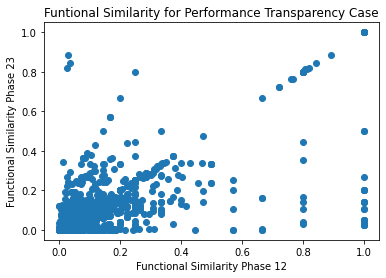

In [23]:
plt.scatter(stage12_bogota1['similarity_x'], stage12_bogota1['similarity_y'])
plt.xlabel("Functional Similarity Phase 12")
plt.ylabel("Functional Similarity Phase 23")
plt.title("Funtional Similarity for Performance Transparency Case")

In [24]:
import matplotlib.pyplot as plt
phase34_bogota1 = df2_bogota1[~(df2_bogota1['user1'] == df2_bogota1['user2'])]
stage3_bogota1 = phase34_bogota1.loc[(phase34_bogota1['user1_phase'] == 3) & (phase34_bogota1['user2_phase'] == 4)]


In [25]:
stage3_bogota1_high_similarity = stage3_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [26]:
import matplotlib.pyplot as plt
phase45_bogota1 = df1_bogota1[~(df1_bogota1['user1'] == df1_bogota1['user2'])]
stage4_bogota1 = phase45_bogota1.loc[(phase45_bogota1['user1_phase'] == 4) & (phase45_bogota1['user2_phase'] == 5)]
stage4_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            4            5    0.064516
41         gasierram       bdcajicam            4            5    0.523077
42         gasierram  andfsanchezlem            4            5    0.016129
43         gasierram     dfhincapiem            4            5    0.080645
44         gasierram       helmeraac            4            5    0.102273
45         gasierram      dasalgadob            4            5    0.142857
46         gasierram      falperezgo            4            5    0.006803
47         gasierram       djguzmanc            4            5    0.254902
48         gasierram      gsuarezc04            4            5    0.130435
49         gasierram          oeroaq            4            5    0.010697
50         gasierram         gcantem            4            5    0.016129
51         gasierram     Semoralesga            4            5    0.183099
52         gasierram      jonatan360            4            5    0.161111
53         gasierram  jesusfchavarro            4            5    0.000632
54         gasierram    stevenbustos            4            5    0.119048
55         gasierram  jufcontrerasco            4            5    0.338983
56         gasierram      dsbarrerag            4            5    0.080645
57         gasierram       wolfstain            4            5    0.087273
58         gasierram      miaborjaac            4            5    0.087719
59         gasierram   ivdgonzalezco            4            5    0.060606
60         gasierram    maikellPardo            4            5    0.016129
61         gasierram    Christian7sr            4            5    0.060241
62         gasierram      jsnarvaezb            4            5    0.350515
63         gasierram   gfalbarracinr            4            5    0.075269
64         gasierram        aldiazve            4            5    0.000877
65         gasierram  diegoaguevarar            4            5    0.173077
66         gasierram      fevargasmo            4            5    0.212121
67         gasierram      jmhurtadoc            4            5    0.365385
68         gasierram     anfmorenoso            4            5    0.177966
69         gasierram     nabautistal            4            5    0.540541
70         gasierram          crigar            4            5    0.080645
71         gasierram     jiapulidoar            4            5    0.000371
72         gasierram       jsviveroj            4            5    0.322917
73         gasierram      daandradec            4            5    0.083851
74         gasierram        jcrubioa            4            5    0.162393
75         gasierram  joahernandezca            4            5    0.435115
76         gasierram         ItsNavi            4            5    0.016129
77         gasierram         Zeugmax            4            5    0.016129
78         gasierram    JairVillalba            4            5    0.217822
117     adamantwharf       gasierram            4            5    0.064516
119     adamantwharf       bdcajicam            4            5    0.108108
120     adamantwharf  andfsanchezlem            4            5    0.250000
121     adamantwharf     dfhincapiem            4            5    0.800000
122     adamantwharf       helmeraac            4            5    0.114286
123     adamantwharf      dasalgadob            4            5    0.076923
124     adamantwharf      falperezgo            4            5    0.001990
125     adamantwharf       djguzmanc            4            5    0.060606
126     adamantwharf      gsuarezc04            4            5    0.095238
127     adamantwharf          oeroaq            4            5    0.001494
128     adamantwharf         gcantem            4            5    0.250000
129     adamantwharf     Semoralesga            4            5    0.181818
130     adamantwharf      jonatan360            4            5    0.027211
131     adamantwharf  jesusfchavarro    

In [27]:
stage4_bogota1_high_similarity = stage4_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [28]:
stage34_bogota1 = pd.merge(stage3_bogota1, stage4_bogota1,  how='left', left_on=['user1','user2'], right_on = ['user1','user2'])


Text(0.5, 1.0, 'Funtional Similarity for Performance Transparency Case')

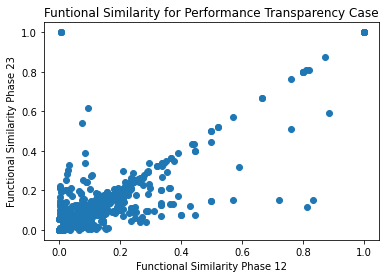

In [29]:
plt.scatter(stage34_bogota1['similarity_x'], stage34_bogota1['similarity_y'])
plt.xlabel("Functional Similarity Phase 12")
plt.ylabel("Functional Similarity Phase 23")
plt.title("Funtional Similarity for Performance Transparency Case")

## Bogota 0 Pairwise Plots 

In [30]:
import matplotlib.pyplot as plt
phase12_bogota0 = df4_bogota0[~(df4_bogota0['user1'] == df4_bogota0['user2'])]
stage1_bogota0 = phase12_bogota0.loc[(phase12_bogota0['user1_phase'] == 1) & (phase12_bogota0['user2_phase'] == 2)]


In [31]:
stage1_bogota0_high_similarity = stage1_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [32]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
phase23_bogota0 = df3_bogota0[~(df3_bogota0['user1'] == df3_bogota0['user2'])]
stage2_bogota0 = phase23_bogota0.loc[(phase23_bogota0['user1_phase'] == 2) & (phase23_bogota0['user2_phase'] == 3)]

In [33]:
stage2_bogota0_high_similarity = stage2_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [34]:
import matplotlib.pyplot as plt
phase34_bogota0 = df2_bogota0[~(df2_bogota0['user1'] == df2_bogota0['user2'])]
stage3_bogota0 = phase34_bogota0.loc[(phase34_bogota0['user1_phase'] == 3) & (phase34_bogota0['user2_phase'] == 4)]

In [35]:
stage3_bogota0_high_similarity = stage3_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [36]:
import matplotlib.pyplot as plt
phase45_bogota0 = df1_bogota0[~(df1_bogota0['user1'] == df1_bogota0['user2'])]
stage4_bogota0 = phase45_bogota0.loc[(phase45_bogota0['user1_phase'] == 4) & (phase45_bogota0['user2_phase'] == 5)]
stage4_bogota0

user1           user2  user1_phase  user2_phase  similarity
37         fffeelipe       mnguzmanc            4            5    0.013912
38         fffeelipe      jmcuestasb            4            5    0.005054
39         fffeelipe      katherinsb            4            5    0.009259
40         fffeelipe    jjrodriguezn            4            5    0.045113
41         fffeelipe           DglyP            4            5    0.012552
42         fffeelipe          cap182            4            5    0.009346
43         fffeelipe     Judgarciani            4            5    0.089041
44         fffeelipe       sacastroc            4            5    0.139394
45         fffeelipe       pcberriop            4            5    0.036649
46         fffeelipe     hsmartineza            4            5    0.048193
47         fffeelipe        Moimolcp            4            5    0.106145
48         fffeelipe     CamiloRueda            4            5    0.033333
49         fffeelipe       juanescai            4            5    0.009346
50         fffeelipe      JoseMolano            4            5    0.075342
51         fffeelipe   maikellPardoA            4            5    0.037037
52         fffeelipe      NicolasZon            4            5    0.052632
53         fffeelipe       camilo654            4            5    0.095238
54         fffeelipe  CristianLozano            4            5    0.036036
55         fffeelipe       jdsuarezj            4            5    0.048193
56         fffeelipe       pipemax85            4            5    0.105691
57         fffeelipe     juandavidro            4            5    0.042373
58         fffeelipe  UNhcrodriguezl            4            5    0.076503
59         fffeelipe     camilo13152            4            5    0.071429
60         fffeelipe    leavendanoro            4            5    0.062069
61         fffeelipe      cdcordobaa            4            5    0.076923
62         fffeelipe      capinillab            4            5    0.069930
63         fffeelipe    lfvalderrama            4            5    0.075949
64         fffeelipe       bsgarciac            4            5    0.081448
65         fffeelipe          gabi04            4            5    0.126506
66         fffeelipe          annipi            4            5    0.009346
67         fffeelipe       jdsolanos            4            5    0.009346
68         fffeelipe        jcneivaa            4            5    0.009346
69         fffeelipe       fmbernalb            4            5    0.009346
70         fffeelipe         MogGy94            4            5    0.009346
71         fffeelipe       yocuervoc            4            5    0.009346
72         fffeelipe       odprietoh            4            5    0.009346
108        mnguzmanc       fffeelipe            4            5    0.013895
110        mnguzmanc      jmcuestasb            4            5    0.014551
111        mnguzmanc      katherinsb            4            5    0.033378
112        mnguzmanc    jjrodriguezn            4            5    0.006935
113        mnguzmanc           DglyP            4            5    0.954160
114        mnguzmanc          cap182            4            5    0.000436
115        mnguzmanc     Judgarciani            4            5    0.024570
116        mnguzmanc       sacastroc            4            5    0.012377
117        mnguzmanc       pcberriop            4            5    0.008895
118        mnguzmanc     hsmartineza            4            5    0.010716
119        mnguzmanc        Moimolcp            4            5    0.012755
120        mnguzmanc     CamiloRueda            4            5    0.002572
121        mnguzmanc       juanescai            4            5    0.000436
122        mnguzmanc      JoseMolano            4            5    0.008617
123        mnguzmanc   maikellPardoA            4            5    0.001745
124        mnguzmanc      NicolasZon            4            5    0.003047
125        mnguzmanc       camilo654    

In [37]:
stage4_bogota0_high_similarity = stage4_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota0_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0        odprietoh       yocuervoc            4            5    1.000000
1        jdsolanos          cap182            4            5    1.000000
2        jdsolanos          annipi            4            5    1.000000
3        jdsolanos        jcneivaa            4            5    1.000000
4        jdsolanos       fmbernalb            4            5    1.000000
5        jdsolanos         MogGy94            4            5    1.000000
6        jdsolanos       odprietoh            4            5    1.000000
7         jcneivaa       juanescai            4            5    1.000000
8        fmbernalb       jdsolanos            4            5    1.000000
9        mnguzmanc           DglyP            4            5    0.954160
10           DglyP       mnguzmanc            4            5    0.778354
11    jjrodriguezn      JoseMolano            4            5    0.462963
12   maikellPardoA  CristianLozano            4            5    0.444444
13  CristianLozano   maikellPardoA            4            5    0.444444
14      JoseMolano    jjrodriguezn            4            5    0.438596
15      JoseMolano  UNhcrodriguezl            4            5    0.414141
16      JoseMolano     camilo13152            4            5    0.408163
17    jjrodriguezn     hsmartineza            4            5    0.352113
18      capinillab     juandavidro            4            5    0.333333
19      capinillab       jdsuarezj            4            5    0.320513
20      JoseMolano       pipemax85            4            5    0.316667
21   maikellPardoA      NicolasZon            4            5    0.285714
22  UNhcrodriguezl       pcberriop            4            5    0.265734
23  UNhcrodriguezl      capinillab            4            5    0.236364
24     hsmartineza    lfvalderrama            4            5    0.221154
25       pipemax85      cdcordobaa            4            5    0.169811
26      NicolasZon       camilo654            4            5    0.157895
27      capinillab       sacastroc            4            5    0.147059
28      JoseMolano       bsgarciac            4            5    0.144654
29       sacastroc       fffeelipe            4            5    0.137143
30       sacastroc          gabi04            4            5    0.132867
31     Judgarciani        Moimolcp            4            5    0.127451
32       bsgarciac     Judgarciani            4            5    0.125000
33     juandavidro    leavendanoro            4            5    0.105263
34   maikellPardoA     CamiloRueda            4            5    0.081633
35           DglyP      katherinsb            4            5    0.037366
36           DglyP      jmcuestasb            4            5    0.025490

In [38]:
stage34_bogota0 = pd.merge(stage3_bogota0, stage4_bogota0,  how='left', left_on=['user1','user2'], right_on = ['user1','user2'])
stage34_bogota0

user1           user2  user1_phase_x  user2_phase_x  \
0          fffeelipe       mnguzmanc              3              4   
1          fffeelipe      jmcuestasb              3              4   
2          fffeelipe      katherinsb              3              4   
3          fffeelipe    jjrodriguezn              3              4   
4          fffeelipe           DglyP              3              4   
5          fffeelipe          cap182              3              4   
6          fffeelipe     Judgarciani              3              4   
7          fffeelipe       sacastroc              3              4   
8          fffeelipe       pcberriop              3              4   
9          fffeelipe     hsmartineza              3              4   
10         fffeelipe        Moimolcp              3              4   
11         fffeelipe     CamiloRueda              3              4   
12         fffeelipe       juanescai              3              4   
13         fffeelipe      JoseMolano              3              4   
14         fffeelipe   maikellPardoA              3              4   
15         fffeelipe      NicolasZon              3              4   
16         fffeelipe       camilo654              3              4   
17         fffeelipe  CristianLozano              3              4   
18         fffeelipe       jdsuarezj              3              4   
19         fffeelipe       pipemax85              3              4   
20         fffeelipe     juandavidro              3              4   
21         fffeelipe  UNhcrodriguezl              3              4   
22         fffeelipe     camilo13152              3              4   
23         fffeelipe    leavendanoro              3              4   
24         fffeelipe      cdcordobaa              3              4   
25         fffeelipe      capinillab              3              4   
26         fffeelipe    lfvalderrama              3              4   
27         fffeelipe       bsgarciac              3              4   
28         fffeelipe          gabi04              3              4   
29         fffeelipe          annipi              3              4   
30         fffeelipe       jdsolanos              3              4   
31         fffeelipe        jcneivaa              3              4   
32         fffeelipe       fmbernalb              3              4   
33         fffeelipe         MogGy94              3              4   
34         fffeelipe       yocuervoc              3              4   
35         fffeelipe       odprietoh              3              4   
36         mnguzmanc       fffeelipe              3              4   
37         mnguzmanc      jmcuestasb              3              4   
38         mnguzmanc      katherinsb              3              4   
39         mnguzmanc    jjrodriguezn              3              4   
40         mnguzmanc           DglyP              3              4   
41         mnguzmanc          cap182              3              4   
42         mnguzmanc     Judgarciani              3              4   
43         mnguzmanc       sacastroc              3              4   
44         mnguzmanc       pcberriop              3              4   
45         mnguzmanc     hsmartineza              3              4   
46         mnguzmanc        Moimolcp              3              4   
47         mnguzmanc     CamiloRueda              3              4   
48         mnguzmanc       juanescai              3              4   
49         mnguzmanc      JoseMolano              3              4   
50         mnguzmanc   maikellPardoA              3              4   
51         mnguzmanc      NicolasZon              3              4   
52         mnguzmanc       camilo654              3              4   
53         mnguzmanc  CristianLozano              3              4   
54         mnguzmanc       jdsuarezj              3              4   
55         mnguzmanc       pipemax85              3              4   
56         mnguzmanc     

Text(0.5, 1.0, 'Funtional Similarity for No Transparency Case')

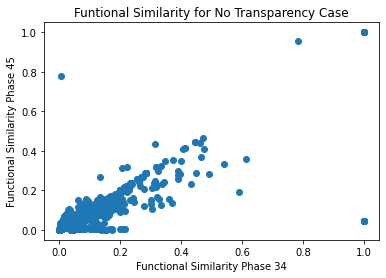

In [39]:
plt.scatter(stage34_bogota0['similarity_x'], stage34_bogota0['similarity_y'])
plt.xlabel("Functional Similarity Phase 34")
plt.ylabel("Functional Similarity Phase 45")
plt.title("Funtional Similarity for No Transparency Case")

In [40]:
overall_phase5_bogota3['functions'].to_frame()

functions
122  [google.maps.Map, document.getElementById, goo...
123  [jquery.min.js, bootstrap.min.css, awesome.min...
124  [FirstLook.css, bootstrap.min.css, jquery.min....
125  [materialize.min.css, style.css, awesome.min.c...
126  [.bin, e.g, protractor.config.js, exports.conf...
127  [.js, style.css, superplaceholder.js, superpla...
128  [.create, package.json, pkg.title, pkg.version...
129  [.js, jsInitMap.js, .ajax, module.exports, opt...
130  [.css, .js, js.org, .v, bootstrap.min.css, the...
131  [bootstrap.min.css, styles.css, jquery.min.js,...
132  [.l, morado.jpg, a.active, .active, google.map...
133  [.mifecha, bootstrap.min.css, theme.min.css, j...
134  [main.css, material.min.css, angular.min.js, a...
135  [bootstrap.min.css, theme.min.css, style.css, ...
136  [bootstrap.min.css, portfolio.css, awesome.min...
137  [bootstrap.min.css, uic.edu, .js, bootstrap.mi...
138  [styles.css, jquery.min.js, map.js, markerclus...
139  [materialize.css, materialize.min.css, styleSe...
140  [bootstrap.min.css, theme.min.css, awesome.min...
141  [bootstrap.min.css, awesome.min.css, app.css, ...
142  [favicon.ico, .min.js, bootstrap.min.js, appli...
143  [bootstrap.min.css, estilos.css, .min.js, boot...
144  [.create, package.json, pkg.title, pkg.version...
145  [style.css, favicon.ico, bootstrap.min.css, th...
146  [bootstrap.min.css, mdb.min.css, demos.css, st...
147  [latest.min.js, jquery.min.js, bootstrap.min.c...
148  [bootstrap.min.css, index.css, criteria.css, j...
149  [ownStyle.css, theme.min.css, bootstrap.min.cs...
150  [unal.edu.co, bootstrap.min.css, template.css,...
151  [jmalvarezd.js, bootstrap.min.css, jquery.min....
152  [bootstrap.min.css, data.json, jquery.min.js, ...
153  [js.org, .v, .min.js, style.css, jquery.min.js...
154  [style.css, main.js, document.getElementById, ...
155  [bootstrap.min.css, Respond.js, shiv.min.js, r...
156  [bootstrap.min.css, style.css, bulk.jpg, jquer...
157  [bootstrap.min.css, jquery.min.js, .min.css, t...
158  [jquery.min.js, bootstrap.min.css, stylesLogin...
159  [jquery.min.js, bootstrap.min.js, .js, script....
160                                                 []
161                                                 []
162                                                 []

In [41]:
%store stage1_bogota0_high_similarity
%store stage2_bogota0_high_similarity
%store stage3_bogota0_high_similarity
%store stage4_bogota0_high_similarity

%store stage1_bogota1_high_similarity
%store stage2_bogota1_high_similarity
%store stage3_bogota1_high_similarity
%store stage4_bogota1_high_similarity

%store stage1_bogota2_high_similarity
%store stage2_bogota2_high_similarity
%store stage3_bogota2_high_similarity
%store stage4_bogota2_high_similarity

%store stage1_bogota3_high_similarity
%store stage2_bogota3_high_similarity
%store stage3_bogota3_high_similarity
%store stage4_bogota3_high_similarity

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)


In [42]:
## Bogota 0 (No Transparency)
import numpy as np

mean_stage1_bogota0_high_similarity = (stage1_bogota0_high_similarity['similarity']).describe().loc['mean']
median_stage1_bogota0_high_similarity = (stage1_bogota0_high_similarity['similarity']).median()
min_stage1_bogota0_high_similarity = (stage1_bogota0_high_similarity['similarity']).min()

ilogmean_stage1_bogota0_high_similarity = np.log((1-stage1_bogota0_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage1_bogota0_high_similarity = np.log((1-stage1_bogota0_high_similarity['similarity'])+1).median()
ilogmin_stage1_bogota0_high_similarity = np.log((1-stage1_bogota0_high_similarity['similarity'])+1).min()

logmean_stage1_bogota0_high_similarity = np.log(stage1_bogota0_high_similarity['similarity']).describe().loc['mean']
logmedian_stage1_bogota0_high_similarity = np.log(stage1_bogota0_high_similarity['similarity']).median()
logmin_stage1_bogota0_high_similarity = np.log(stage1_bogota0_high_similarity['similarity']).min()

mean_stage2_bogota0_high_similarity = stage2_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota0_high_similarity = stage2_bogota0_high_similarity['similarity'].median()
min_stage2_bogota0_high_similarity = stage2_bogota0_high_similarity['similarity'].min()

ilogmean_stage2_bogota0_high_similarity = np.log((1-stage2_bogota0_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage2_bogota0_high_similarity = np.log((1-stage2_bogota0_high_similarity['similarity'])+1).median()
ilogmin_stage2_bogota0_high_similarity = np.log((1-stage2_bogota0_high_similarity['similarity'])+1).min()

logmean_stage2_bogota0_high_similarity = np.log(stage2_bogota0_high_similarity['similarity']).describe().loc['mean']
logmedian_stage2_bogota0_high_similarity = np.log(stage2_bogota0_high_similarity['similarity']).median()
logmin_stage2_bogota0_high_similarity = np.log(stage2_bogota0_high_similarity['similarity']).min()

mean_stage3_bogota0_high_similarity = stage3_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota0_high_similarity = stage3_bogota0_high_similarity['similarity'].median()
min_stage3_bogota0_high_similarity = stage3_bogota0_high_similarity['similarity'].min()

ilogmean_stage3_bogota0_high_similarity = np.log((1-stage3_bogota0_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage3_bogota0_high_similarity = np.log((1-stage3_bogota0_high_similarity['similarity'])+1).median()
ilogmin_stage3_bogota0_high_similarity = np.log((1-stage3_bogota0_high_similarity['similarity'])+1).min()

logmean_stage3_bogota0_high_similarity = np.log(stage3_bogota0_high_similarity['similarity']).describe().loc['mean']
logmedian_stage3_bogota0_high_similarity = np.log(stage3_bogota0_high_similarity['similarity']).median()
logmin_stage3_bogota0_high_similarity = np.log(stage3_bogota0_high_similarity['similarity']).min()

mean_stage4_bogota0_high_similarity = stage4_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota0_high_similarity = stage4_bogota0_high_similarity['similarity'].median()
min_stage4_bogota0_high_similarity = stage4_bogota0_high_similarity['similarity'].min()


ilogmean_stage4_bogota0_high_similarity = np.log((1-stage4_bogota0_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage4_bogota0_high_similarity = np.log((1-stage4_bogota0_high_similarity['similarity'])+1).median()
ilogmin_stage4_bogota0_high_similarity = np.log((1-stage4_bogota0_high_similarity['similarity'])+1).min()

logmean_stage4_bogota0_high_similarity = np.log(stage4_bogota0_high_similarity['similarity']).describe().loc['mean']
logmedian_stage4_bogota0_high_similarity = np.log(stage4_bogota0_high_similarity['similarity']).median()
logmin_stage4_bogota0_high_similarity = np.log(stage4_bogota0_high_similarity['similarity']).min()


In [43]:
## Bogota 1 (Performance Transparency)
mean_stage1_bogota1_high_similarity = stage1_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota1_high_similarity = stage1_bogota1_high_similarity['similarity'].median()
min_stage1_bogota1_high_similarity = stage1_bogota1_high_similarity['similarity'].min()

ilogmean_stage1_bogota1_high_similarity = np.log((1-stage1_bogota1_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage1_bogota1_high_similarity = np.log((1-stage1_bogota1_high_similarity['similarity'])+1).median()
ilogmin_stage1_bogota1_high_similarity = np.log((1-stage1_bogota1_high_similarity['similarity'])+1).min()

logmean_stage1_bogota1_high_similarity = np.log(stage1_bogota1_high_similarity['similarity']).describe().loc['mean']
logmedian_stage1_bogota1_high_similarity = np.log(stage1_bogota1_high_similarity['similarity']).median()
logmin_stage1_bogota1_high_similarity = np.log(stage1_bogota1_high_similarity['similarity']).min()

mean_stage2_bogota1_high_similarity = stage2_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota1_high_similarity = stage2_bogota1_high_similarity['similarity'].median()
min_stage2_bogota1_high_similarity = stage2_bogota1_high_similarity['similarity'].min()

ilogmean_stage2_bogota1_high_similarity = np.log((1-stage2_bogota1_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage2_bogota1_high_similarity = np.log((1-stage2_bogota1_high_similarity['similarity'])+1).median()
ilogmin_stage2_bogota1_high_similarity = np.log((1-stage2_bogota1_high_similarity['similarity'])+1).min()

logmean_stage2_bogota1_high_similarity = np.log(stage2_bogota1_high_similarity['similarity']).describe().loc['mean']
logmedian_stage2_bogota1_high_similarity = np.log(stage2_bogota1_high_similarity['similarity']).median()
logmin_stage2_bogota1_high_similarity = np.log(stage2_bogota1_high_similarity['similarity']).min()

mean_stage3_bogota1_high_similarity = stage3_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota1_high_similarity = stage3_bogota1_high_similarity['similarity'].median()
min_stage3_bogota1_high_similarity = stage3_bogota1_high_similarity['similarity'].min()

ilogmean_stage3_bogota1_high_similarity = np.log((1-stage3_bogota1_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage3_bogota1_high_similarity = np.log((1-stage3_bogota1_high_similarity['similarity'])+1).median()
ilogmin_stage3_bogota1_high_similarity = np.log((1-stage3_bogota1_high_similarity['similarity'])+1).min()

logmean_stage3_bogota1_high_similarity = np.log(stage3_bogota1_high_similarity['similarity']).describe().loc['mean']
logmedian_stage3_bogota1_high_similarity = np.log(stage3_bogota1_high_similarity['similarity']).median()
logmin_stage3_bogota1_high_similarity = np.log(stage3_bogota1_high_similarity['similarity']).min()

mean_stage4_bogota1_high_similarity = stage4_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota1_high_similarity = stage4_bogota1_high_similarity['similarity'].median()
min_stage4_bogota1_high_similarity = stage4_bogota1_high_similarity['similarity'].min()

ilogmean_stage4_bogota1_high_similarity = np.log((1-stage4_bogota1_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage4_bogota1_high_similarity = np.log((1-stage4_bogota1_high_similarity['similarity'])+1).median()
ilogmin_stage4_bogota1_high_similarity = np.log((1-stage4_bogota1_high_similarity['similarity'])+1).min()

logmean_stage4_bogota1_high_similarity = np.log(stage4_bogota1_high_similarity['similarity']).describe().loc['mean']
logmedian_stage4_bogota1_high_similarity = np.log(stage4_bogota1_high_similarity['similarity']).median()
logmin_stage4_bogota1_high_similarity = np.log(stage4_bogota1_high_similarity['similarity']).min()

In [44]:
## Bogota 2 (Solution Transparency)
mean_stage1_bogota2_high_similarity = stage1_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota2_high_similarity = stage1_bogota2_high_similarity['similarity'].median()
min_stage1_bogota2_high_similarity = stage1_bogota2_high_similarity['similarity'].min()

ilogmean_stage1_bogota2_high_similarity = np.log((1-stage1_bogota2_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage1_bogota2_high_similarity = np.log((1-stage1_bogota2_high_similarity['similarity'])+1).median()
ilogmin_stage1_bogota2_high_similarity = np.log((1-stage1_bogota2_high_similarity['similarity'])+1).min()

logmean_stage1_bogota2_high_similarity = np.log(stage1_bogota2_high_similarity['similarity']).describe().loc['mean']
logmedian_stage1_bogota2_high_similarity = np.log(stage1_bogota2_high_similarity['similarity']).median()
logmin_stage1_bogota2_high_similarity = np.log(stage1_bogota2_high_similarity['similarity']).min()

mean_stage2_bogota2_high_similarity = stage2_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota2_high_similarity = stage2_bogota2_high_similarity['similarity'].median()
min_stage2_bogota2_high_similarity = stage2_bogota2_high_similarity['similarity'].min()

ilogmean_stage2_bogota2_high_similarity = np.log((1-stage2_bogota2_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage2_bogota2_high_similarity = np.log((1-stage2_bogota2_high_similarity['similarity'])+1).median()
ilogmin_stage2_bogota2_high_similarity = np.log((1-stage2_bogota2_high_similarity['similarity'])+1).min()

logmean_stage2_bogota2_high_similarity = np.log(stage2_bogota2_high_similarity['similarity']).describe().loc['mean']
logmedian_stage2_bogota2_high_similarity = np.log(stage2_bogota2_high_similarity['similarity']).median()
logmin_stage2_bogota2_high_similarity = np.log(stage2_bogota2_high_similarity['similarity']).min()

mean_stage3_bogota2_high_similarity = stage3_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota2_high_similarity = stage3_bogota2_high_similarity['similarity'].median()
min_stage3_bogota2_high_similarity = stage3_bogota2_high_similarity['similarity'].min()


ilogmean_stage3_bogota2_high_similarity = np.log((1-stage3_bogota2_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage3_bogota2_high_similarity = np.log((1-stage3_bogota2_high_similarity['similarity'])+1).median()
ilogmin_stage3_bogota2_high_similarity = np.log((1-stage3_bogota2_high_similarity['similarity'])+1).min()

logmean_stage3_bogota2_high_similarity = np.log(stage3_bogota2_high_similarity['similarity']).describe().loc['mean']
logmedian_stage3_bogota2_high_similarity = np.log(stage3_bogota2_high_similarity['similarity']).median()
logmin_stage3_bogota2_high_similarity = np.log(stage3_bogota2_high_similarity['similarity']).min()

mean_stage4_bogota2_high_similarity = stage4_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota2_high_similarity = stage4_bogota2_high_similarity['similarity'].median()
min_stage4_bogota2_high_similarity = stage4_bogota2_high_similarity['similarity'].min()

ilogmean_stage4_bogota2_high_similarity = np.log((1-stage4_bogota2_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage4_bogota2_high_similarity = np.log((1-stage4_bogota2_high_similarity['similarity'])+1).median()
ilogmin_stage4_bogota2_high_similarity = np.log((1-stage4_bogota2_high_similarity['similarity'])+1).min()

logmean_stage4_bogota2_high_similarity = np.log(stage4_bogota2_high_similarity['similarity']).describe().loc['mean']
logmedian_stage4_bogota2_high_similarity = np.log(stage4_bogota2_high_similarity['similarity']).median()
logmin_stage4_bogota2_high_similarity = np.log(stage4_bogota2_high_similarity['similarity']).min()

In [45]:
## Bogota 3 (Full Transparency)
mean_stage1_bogota3_high_similarity = stage1_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota3_high_similarity = stage1_bogota3_high_similarity['similarity'].median()
min_stage1_bogota3_high_similarity = stage1_bogota3_high_similarity['similarity'].min()

ilogmean_stage1_bogota3_high_similarity = np.log((1-stage1_bogota3_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage1_bogota3_high_similarity = np.log((1-stage1_bogota3_high_similarity['similarity'])+1).median()
ilogmin_stage1_bogota3_high_similarity = np.log((1-stage1_bogota3_high_similarity['similarity'])+1).min()

logmean_stage1_bogota3_high_similarity = np.log(stage1_bogota3_high_similarity['similarity']).describe().loc['mean']
logmedian_stage1_bogota3_high_similarity = np.log(stage1_bogota3_high_similarity['similarity']).median()
logmin_stage1_bogota3_high_similarity = np.log(stage1_bogota3_high_similarity['similarity']).min()

mean_stage2_bogota3_high_similarity = stage2_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota3_high_similarity = stage2_bogota3_high_similarity['similarity'].median()
min_stage2_bogota3_high_similarity = stage2_bogota3_high_similarity['similarity'].min()

ilogmean_stage2_bogota3_high_similarity = np.log((1-stage2_bogota3_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage2_bogota3_high_similarity = np.log((1-stage2_bogota3_high_similarity['similarity'])+1).median()
ilogmin_stage2_bogota3_high_similarity = np.log((1-stage2_bogota3_high_similarity['similarity'])+1).min()

logmean_stage2_bogota3_high_similarity = np.log(stage2_bogota3_high_similarity['similarity']).describe().loc['mean']
logmedian_stage2_bogota3_high_similarity = np.log(stage2_bogota3_high_similarity['similarity']).median()
logmin_stage2_bogota3_high_similarity = np.log(stage2_bogota3_high_similarity['similarity']).min()

mean_stage3_bogota3_high_similarity = stage3_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota3_high_similarity = stage3_bogota3_high_similarity['similarity'].median()
min_stage3_bogota3_high_similarity = stage3_bogota3_high_similarity['similarity'].min()

ilogmean_stage3_bogota3_high_similarity = np.log((1-stage3_bogota3_high_similarity['similarity'].describe())+1).loc['mean']
ilogmedian_stage3_bogota3_high_similarity = np.log((1-stage3_bogota3_high_similarity['similarity'])+1).median()
ilogmin_stage3_bogota3_high_similarity = np.log((1-stage3_bogota3_high_similarity['similarity'])+1).min()

logmean_stage3_bogota3_high_similarity = np.log(stage3_bogota3_high_similarity['similarity'].describe()).loc['mean']
logmedian_stage3_bogota3_high_similarity = np.log(stage3_bogota3_high_similarity['similarity']).median()
logmin_stage3_bogota3_high_similarity = np.log(stage3_bogota3_high_similarity['similarity']).min()

mean_stage4_bogota3_high_similarity = stage4_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota3_high_similarity = stage4_bogota3_high_similarity['similarity'].median()
min_stage4_bogota3_high_similarity = stage4_bogota3_high_similarity['similarity'].min()

ilogmean_stage4_bogota3_high_similarity = np.log((1-stage4_bogota3_high_similarity['similarity'])+1).describe().loc['mean']
ilogmedian_stage4_bogota3_high_similarity = np.log((1-stage4_bogota3_high_similarity['similarity'])+1).median()
ilogmin_stage4_bogota3_high_similarity = np.log((1-stage4_bogota3_high_similarity['similarity'])+1).min()

logmean_stage4_bogota3_high_similarity = np.log(stage4_bogota3_high_similarity['similarity']).describe().loc['mean']
logmedian_stage4_bogota3_high_similarity = np.log(stage4_bogota3_high_similarity['similarity']).median()
logmin_stage4_bogota3_high_similarity = np.log(stage4_bogota3_high_similarity['similarity']).min()

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


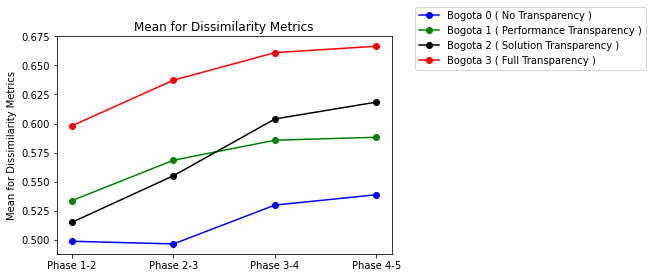

In [46]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [1-mean_stage1_bogota0_high_similarity, 1-mean_stage2_bogota0_high_similarity, 1-mean_stage3_bogota0_high_similarity, 1-mean_stage4_bogota0_high_similarity]
y2 = [1-mean_stage1_bogota1_high_similarity, 1-mean_stage2_bogota1_high_similarity, 1-mean_stage3_bogota1_high_similarity, 1-mean_stage4_bogota1_high_similarity]
y3 = [1-mean_stage1_bogota2_high_similarity, 1-mean_stage2_bogota2_high_similarity, 1-mean_stage3_bogota2_high_similarity, 1-mean_stage4_bogota2_high_similarity]
y4 = [1-mean_stage1_bogota3_high_similarity, 1-mean_stage2_bogota3_high_similarity, 1-mean_stage3_bogota3_high_similarity, 1-mean_stage4_bogota3_high_similarity]


x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean for Dissimilarity Metrics")
plt.ylabel("Mean for Dissimilarity Metrics")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

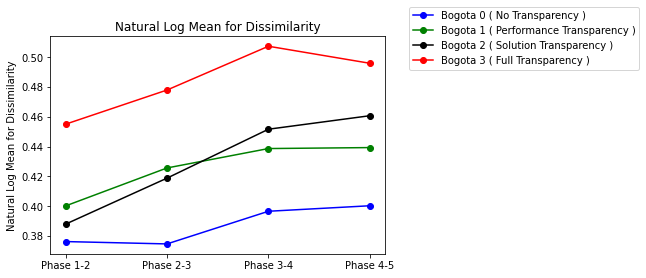

In [47]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ilogmean_stage1_bogota0_high_similarity, ilogmean_stage2_bogota0_high_similarity, ilogmean_stage3_bogota0_high_similarity, ilogmean_stage4_bogota0_high_similarity]
y2 = [ilogmean_stage1_bogota1_high_similarity, ilogmean_stage2_bogota1_high_similarity, ilogmean_stage3_bogota1_high_similarity, ilogmean_stage4_bogota1_high_similarity]
y3 = [ilogmean_stage1_bogota2_high_similarity, ilogmean_stage2_bogota2_high_similarity, ilogmean_stage3_bogota2_high_similarity, ilogmean_stage4_bogota2_high_similarity]
y4 = [ilogmean_stage1_bogota3_high_similarity, ilogmean_stage2_bogota3_high_similarity, ilogmean_stage3_bogota3_high_similarity, ilogmean_stage4_bogota3_high_similarity]


x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Mean for Dissimilarity")
plt.ylabel("Natural Log Mean for Dissimilarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

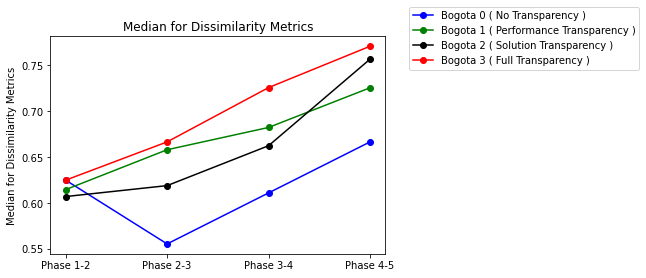

In [48]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [1-median_stage1_bogota0_high_similarity, 1-median_stage2_bogota0_high_similarity, 1-median_stage3_bogota0_high_similarity, 1-median_stage4_bogota0_high_similarity]
y2 = [1-median_stage1_bogota1_high_similarity, 1-median_stage2_bogota1_high_similarity, 1-median_stage3_bogota1_high_similarity, 1-median_stage4_bogota1_high_similarity]
y3 = [1-median_stage1_bogota2_high_similarity, 1-median_stage2_bogota2_high_similarity, 1-median_stage3_bogota2_high_similarity, 1-median_stage4_bogota2_high_similarity]
y4 = [1-median_stage1_bogota3_high_similarity, 1-median_stage2_bogota3_high_similarity, 1-median_stage3_bogota3_high_similarity, 1-median_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median for Dissimilarity Metrics")
plt.ylabel("Median for Dissimilarity Metrics")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

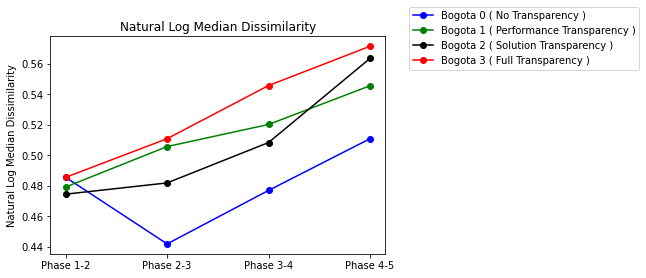

In [49]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ilogmedian_stage1_bogota0_high_similarity, ilogmedian_stage2_bogota0_high_similarity, ilogmedian_stage3_bogota0_high_similarity, ilogmedian_stage4_bogota0_high_similarity]
y2 = [ilogmedian_stage1_bogota1_high_similarity, ilogmedian_stage2_bogota1_high_similarity, ilogmedian_stage3_bogota1_high_similarity, ilogmedian_stage4_bogota1_high_similarity]
y3 = [ilogmedian_stage1_bogota2_high_similarity, ilogmedian_stage2_bogota2_high_similarity, ilogmedian_stage3_bogota2_high_similarity, ilogmedian_stage4_bogota2_high_similarity]
y4 = [ilogmedian_stage1_bogota3_high_similarity, ilogmedian_stage2_bogota3_high_similarity, ilogmedian_stage3_bogota3_high_similarity, ilogmedian_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Median Dissimilarity")
plt.ylabel("Natural Log Median Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

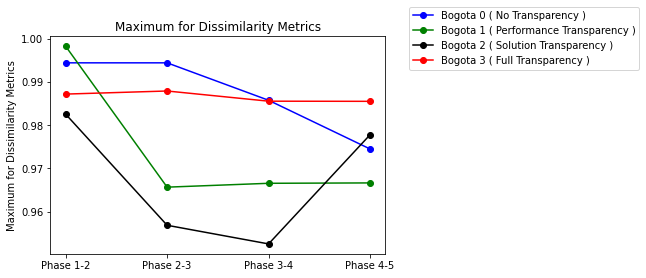

In [50]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [1-min_stage1_bogota0_high_similarity, 1-min_stage2_bogota0_high_similarity, 1-min_stage3_bogota0_high_similarity, 1-min_stage4_bogota0_high_similarity]
y2 = [1-min_stage1_bogota1_high_similarity, 1-min_stage2_bogota1_high_similarity, 1-min_stage3_bogota1_high_similarity, 1-min_stage4_bogota1_high_similarity]
y3 = [1-min_stage1_bogota2_high_similarity, 1-min_stage2_bogota2_high_similarity, 1-min_stage3_bogota2_high_similarity, 1-min_stage4_bogota2_high_similarity]
y4 = [1-min_stage1_bogota3_high_similarity, 1-min_stage2_bogota3_high_similarity, 1-min_stage3_bogota3_high_similarity, 1-min_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Maximum for Dissimilarity Metrics")
plt.ylabel("Maximum for Dissimilarity Metrics")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

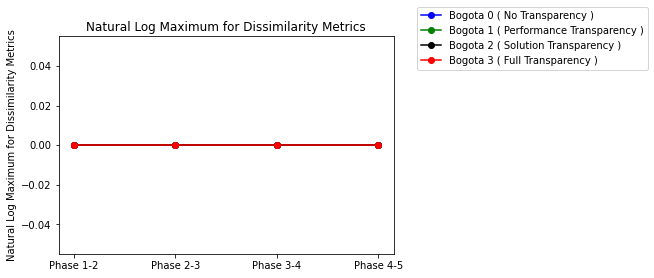

In [51]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ilogmin_stage1_bogota0_high_similarity, ilogmin_stage2_bogota0_high_similarity, ilogmin_stage3_bogota0_high_similarity, ilogmin_stage4_bogota0_high_similarity]
y2 = [ilogmin_stage1_bogota1_high_similarity, ilogmin_stage2_bogota1_high_similarity, ilogmin_stage3_bogota1_high_similarity, ilogmin_stage4_bogota1_high_similarity]
y3 = [ilogmin_stage1_bogota2_high_similarity, ilogmin_stage2_bogota2_high_similarity, ilogmin_stage3_bogota2_high_similarity, ilogmin_stage4_bogota2_high_similarity]
y4 = [ilogmin_stage1_bogota3_high_similarity, ilogmin_stage2_bogota3_high_similarity, ilogmin_stage3_bogota3_high_similarity, ilogmin_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Maximum for Dissimilarity Metrics")
plt.ylabel("Natural Log Maximum for Dissimilarity Metrics")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

# Graphs Before Inverse

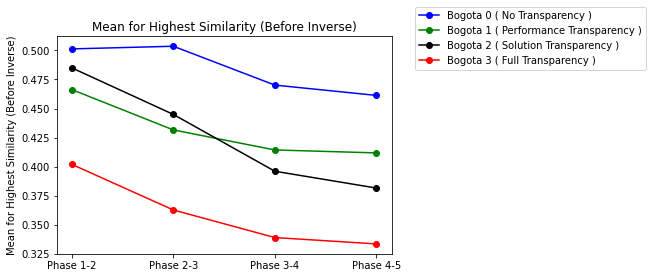

In [52]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [mean_stage1_bogota0_high_similarity, mean_stage2_bogota0_high_similarity, mean_stage3_bogota0_high_similarity, mean_stage4_bogota0_high_similarity]
y2 = [mean_stage1_bogota1_high_similarity, mean_stage2_bogota1_high_similarity, mean_stage3_bogota1_high_similarity, mean_stage4_bogota1_high_similarity]
y3 = [mean_stage1_bogota2_high_similarity, mean_stage2_bogota2_high_similarity, mean_stage3_bogota2_high_similarity, mean_stage4_bogota2_high_similarity]
y4 = [mean_stage1_bogota3_high_similarity, mean_stage2_bogota3_high_similarity, mean_stage3_bogota3_high_similarity, mean_stage4_bogota3_high_similarity]


x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean for Highest Similarity (Before Inverse)")
plt.ylabel("Mean for Highest Similarity (Before Inverse)")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

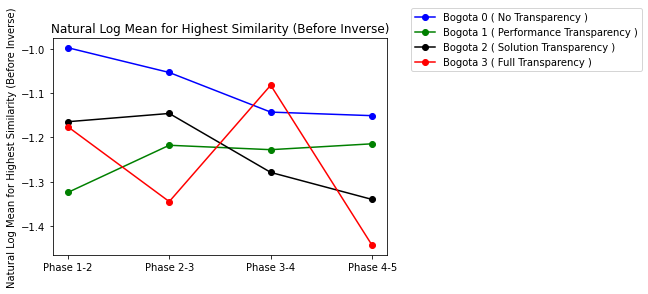

In [53]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [logmean_stage1_bogota0_high_similarity, logmean_stage2_bogota0_high_similarity, logmean_stage3_bogota0_high_similarity, logmean_stage4_bogota0_high_similarity]
y2 = [logmean_stage1_bogota1_high_similarity, logmean_stage2_bogota1_high_similarity, logmean_stage3_bogota1_high_similarity, logmean_stage4_bogota1_high_similarity]
y3 = [logmean_stage1_bogota2_high_similarity, logmean_stage2_bogota2_high_similarity, logmean_stage3_bogota2_high_similarity, logmean_stage4_bogota2_high_similarity]
y4 = [logmean_stage1_bogota3_high_similarity, logmean_stage2_bogota3_high_similarity, logmean_stage3_bogota3_high_similarity, logmean_stage4_bogota3_high_similarity]


x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Mean for Highest Similarity (Before Inverse)")
plt.ylabel("Natural Log Mean for Highest Similarity (Before Inverse)")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

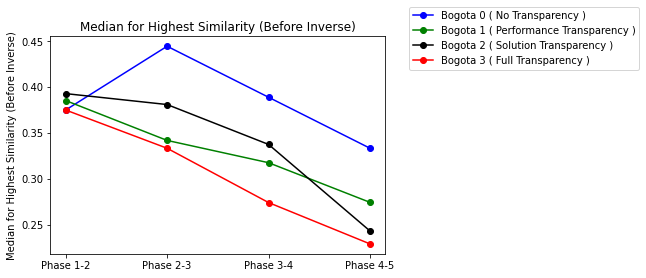

In [54]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [median_stage1_bogota0_high_similarity, median_stage2_bogota0_high_similarity, median_stage3_bogota0_high_similarity, median_stage4_bogota0_high_similarity]
y2 = [median_stage1_bogota1_high_similarity, median_stage2_bogota1_high_similarity, median_stage3_bogota1_high_similarity, median_stage4_bogota1_high_similarity]
y3 = [median_stage1_bogota2_high_similarity, median_stage2_bogota2_high_similarity, median_stage3_bogota2_high_similarity, median_stage4_bogota2_high_similarity]
y4 = [median_stage1_bogota3_high_similarity, median_stage2_bogota3_high_similarity, median_stage3_bogota3_high_similarity, median_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median for Highest Similarity (Before Inverse)")
plt.ylabel("Median for Highest Similarity (Before Inverse)")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

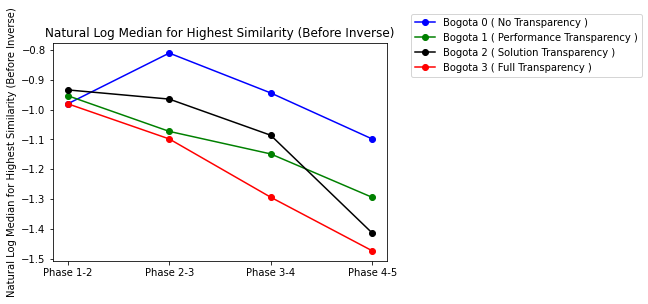

In [55]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [logmedian_stage1_bogota0_high_similarity, logmedian_stage2_bogota0_high_similarity, logmedian_stage3_bogota0_high_similarity, logmedian_stage4_bogota0_high_similarity]
y2 = [logmedian_stage1_bogota1_high_similarity, logmedian_stage2_bogota1_high_similarity, logmedian_stage3_bogota1_high_similarity, logmedian_stage4_bogota1_high_similarity]
y3 = [logmedian_stage1_bogota2_high_similarity, logmedian_stage2_bogota2_high_similarity, logmedian_stage3_bogota2_high_similarity, logmedian_stage4_bogota2_high_similarity]
y4 = [logmedian_stage1_bogota3_high_similarity, logmedian_stage2_bogota3_high_similarity, logmedian_stage3_bogota3_high_similarity, logmedian_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Median for Highest Similarity (Before Inverse)")
plt.ylabel("Natural Log Median for Highest Similarity (Before Inverse)")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

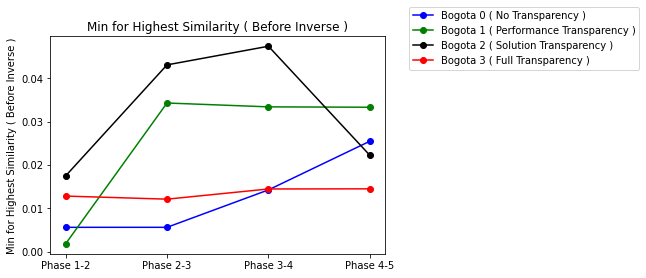

In [56]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [min_stage1_bogota0_high_similarity, min_stage2_bogota0_high_similarity, min_stage3_bogota0_high_similarity, min_stage4_bogota0_high_similarity]
y2 = [min_stage1_bogota1_high_similarity, min_stage2_bogota1_high_similarity, min_stage3_bogota1_high_similarity, min_stage4_bogota1_high_similarity]
y3 = [min_stage1_bogota2_high_similarity, min_stage2_bogota2_high_similarity, min_stage3_bogota2_high_similarity, min_stage4_bogota2_high_similarity]
y4 = [min_stage1_bogota3_high_similarity, min_stage2_bogota3_high_similarity, min_stage3_bogota3_high_similarity, min_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Min for Highest Similarity ( Before Inverse )")
plt.ylabel("Min for Highest Similarity ( Before Inverse )")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

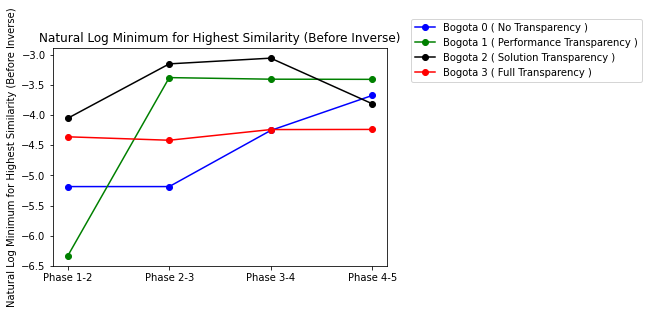

In [57]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [logmin_stage1_bogota0_high_similarity, logmin_stage2_bogota0_high_similarity, logmin_stage3_bogota0_high_similarity, logmin_stage4_bogota0_high_similarity]
y2 = [logmin_stage1_bogota1_high_similarity, logmin_stage2_bogota1_high_similarity, logmin_stage3_bogota1_high_similarity, logmin_stage4_bogota1_high_similarity]
y3 = [logmin_stage1_bogota2_high_similarity, logmin_stage2_bogota2_high_similarity, logmin_stage3_bogota2_high_similarity, logmin_stage4_bogota2_high_similarity]
y4 = [logmin_stage1_bogota3_high_similarity, logmin_stage2_bogota3_high_similarity, logmin_stage3_bogota3_high_similarity, logmin_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Minimum for Highest Similarity (Before Inverse)")
plt.ylabel("Natural Log Minimum for Highest Similarity (Before Inverse)")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Dissimilarity Plot for Bogota 0

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

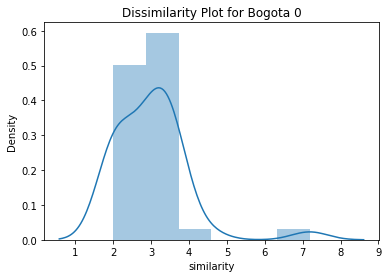

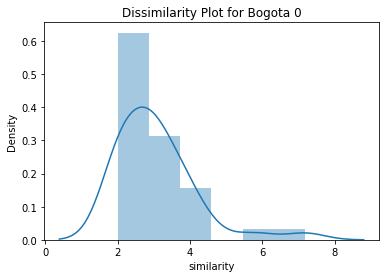

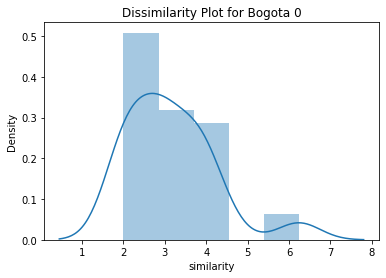

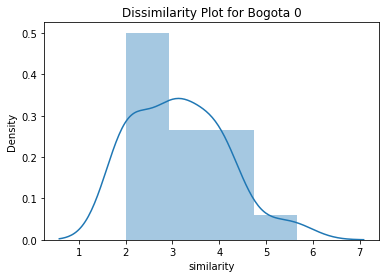

In [58]:
import seaborn as sns 

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity
                                        , stage4_bogota0_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 0")
    sns.distplot((1-np.log(df['similarity']))+1)

## Dissimilarity Plot for Bogota 1

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

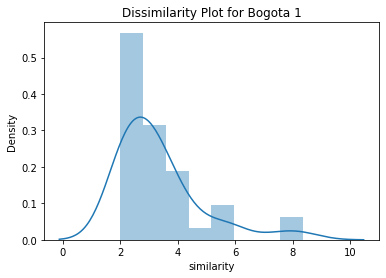

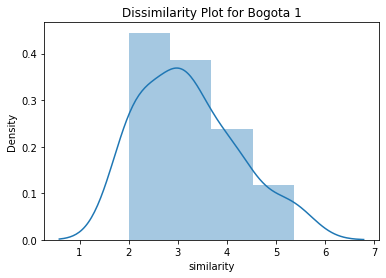

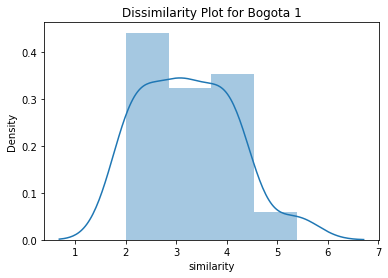

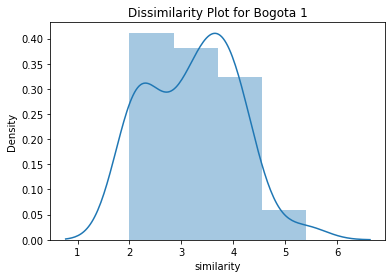

In [59]:
import seaborn as sns 

for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity
                                        , stage4_bogota1_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 1")
    sns.distplot((1-np.log(df['similarity']))+1)

## Dissimilarity Plot for Bogota 2

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

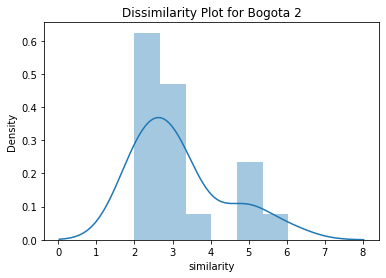

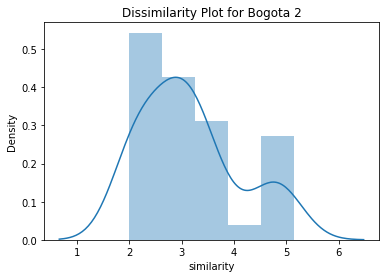

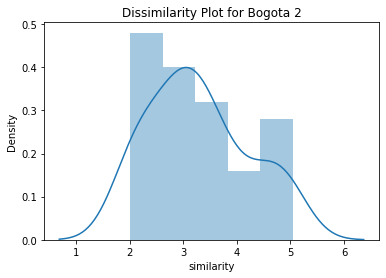

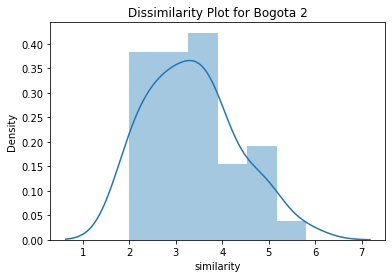

In [60]:
import seaborn as sns 

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity
                                        , stage4_bogota2_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 2")
    sns.distplot((1-np.log(df['similarity']))+1)

## Disimilarity Plot for Bogota 3

/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

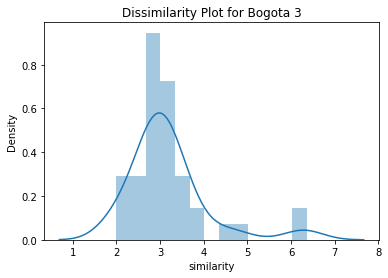

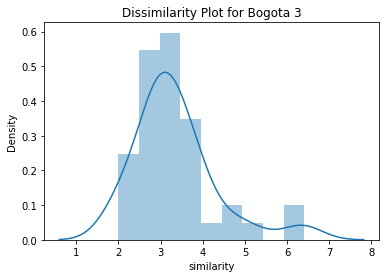

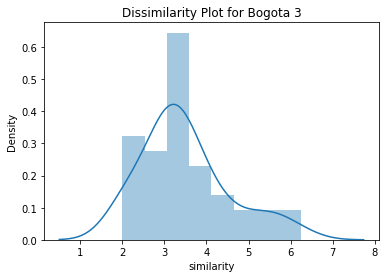

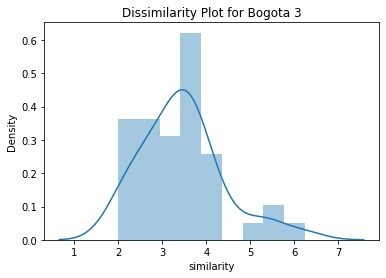

In [61]:
import seaborn as sns 

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity , stage4_bogota3_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 3")
    sns.distplot((1-np.log(df['similarity']))+1)